-나이 클래스가 아니라 그냥 나이 넣고 확인해보기
-feature selection해보기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# 데이터 타입 확인
- categorical data : HomePlanet,CryoSleep,Destination,VIP,Cabin(ordinal일수도),PassengerId
- numeric : Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck

In [272]:
numeric=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for col in numeric:
    train[col]=train[col].fillna(0).astype('int64')
    test[col]=test[col].fillna(0).astype('int64')

In [273]:
train['Transported']=train['Transported'].astype('int64')

# 결측치 확인

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   8693 non-null   object
 1   HomePlanet    8492 non-null   object
 2   CryoSleep     8476 non-null   object
 3   Cabin         8494 non-null   object
 4   Destination   8511 non-null   object
 5   Age           8693 non-null   int64 
 6   VIP           8490 non-null   object
 7   RoomService   8693 non-null   int64 
 8   FoodCourt     8693 non-null   int64 
 9   ShoppingMall  8693 non-null   int64 
 10  Spa           8693 non-null   int64 
 11  VRDeck        8693 non-null   int64 
 12  Name          8493 non-null   object
 13  Transported   8693 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 950.9+ KB


#  분포 확인

In [418]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.234326,220.009318,448.434027,169.572300,304.588865,298.261820,0.503624
std,14.912090,660.519050,1595.790627,598.007164,1125.562559,1134.126417,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [419]:
train.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,3292_03,Earth,False,G/734/S,TRAPPIST-1e,False,Elaney Webstephrey
freq,1,4602,5439,8,5915,8291,2


In [420]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,28.048398,215.062427,428.592238,173.233107,295.895955,304.898293
std,14.624430,601.914503,1510.155974,554.991776,1104.872018,1235.991811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,48.000000,66.000000,27.000000,43.000000,31.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

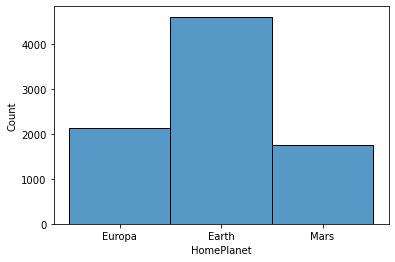

In [421]:
sns.histplot(train['HomePlanet'].dropna(),bins=10)

<AxesSubplot:xlabel='CryoSleep', ylabel='Count'>

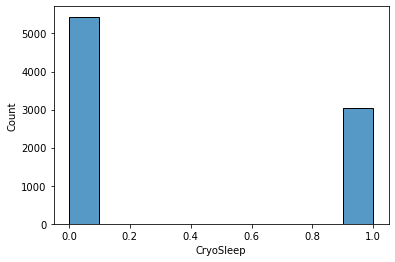

In [422]:
sns.histplot(train['CryoSleep'].dropna(),bins=10)

<AxesSubplot:xlabel='Destination', ylabel='Count'>

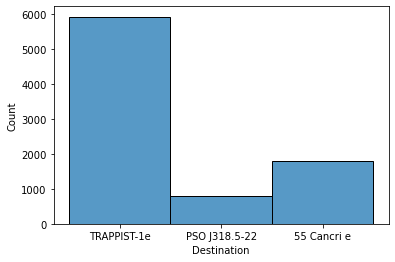

In [423]:
sns.histplot(train['Destination'].dropna(),bins=10)

<AxesSubplot:xlabel='Age', ylabel='Count'>

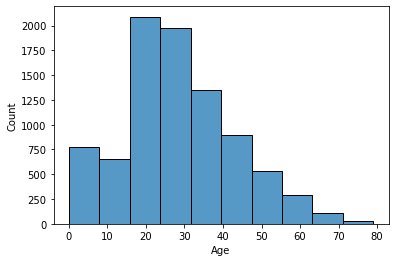

In [424]:
sns.histplot(train['Age'].dropna(),bins=10)

<AxesSubplot:xlabel='VIP', ylabel='Count'>

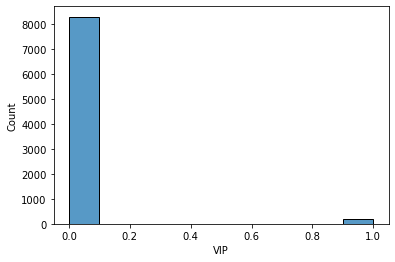

In [425]:
sns.histplot(train['VIP'].dropna(),bins=10)

<AxesSubplot:xlabel='RoomService', ylabel='Count'>

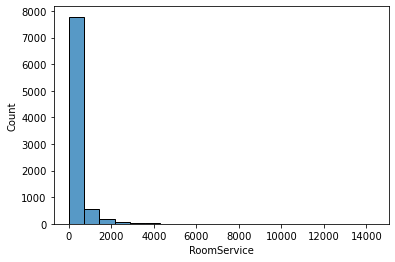

In [426]:
sns.histplot(train['RoomService'].dropna(),bins=20)

<AxesSubplot:xlabel='FoodCourt', ylabel='Count'>

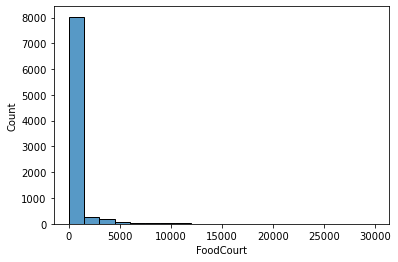

In [427]:
sns.histplot(train['FoodCourt'].dropna(),bins=20)

<AxesSubplot:xlabel='ShoppingMall', ylabel='Count'>

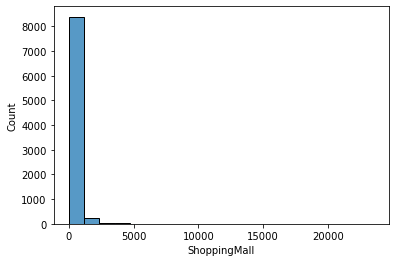

In [428]:
sns.histplot(train['ShoppingMall'].dropna(),bins=20)

<AxesSubplot:xlabel='Spa', ylabel='Count'>

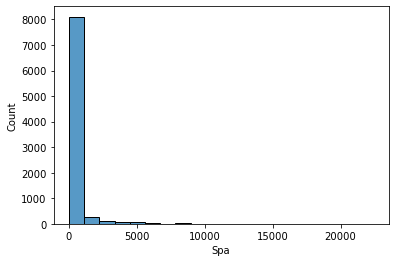

In [429]:
sns.histplot(train['Spa'].dropna(),bins=20)

<AxesSubplot:xlabel='VRDeck', ylabel='Count'>

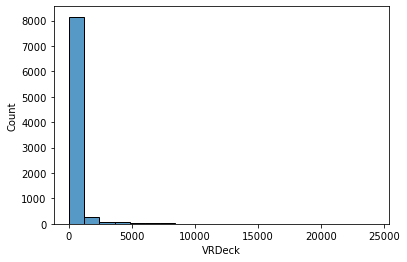

In [430]:
sns.histplot(train['VRDeck'].dropna(),bins=20)

<AxesSubplot:xlabel='Transported', ylabel='Count'>

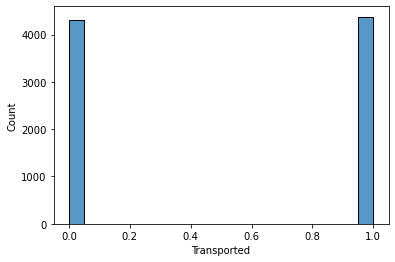

In [431]:
sns.histplot(train['Transported'].dropna(),bins=20)

# passenger and cabin feature Feature
- How many families a passenger acommpany with
- Which deck of a cabin
- Which side of a cabin

In [274]:
train['group']=train['PassengerId'].apply(lambda x:x[:4])
test['group']=test['PassengerId'].apply(lambda x:x[:4])

In [275]:
family_num=train['group'].groupby(train['group']).count()
family_num_test=test['group'].groupby(test['group']).count()

In [276]:
family_num=pd.DataFrame(family_num)
family_num.rename(columns={'group':'family_num'},inplace=True)
family_num.reset_index(inplace=True)

In [277]:
family_num_test=pd.DataFrame(family_num_test)
family_num_test.rename(columns={'group':'family_num'},inplace=True)
family_num_test.reset_index(inplace=True)

In [278]:
df=pd.merge(train,family_num,left_on='group',right_on='group',how='left')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group,family_num
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,0,0001,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,1,0002,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,0,0003,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,0,0003,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,1,0004,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41,True,0,6819,0,1643,74,Gravior Noxnuther,0,9276,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18,False,0,0,0,0,0,Kurta Mondalley,0,9278,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26,False,0,0,1872,1,0,Fayey Connon,1,9279,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32,False,0,1049,0,353,3235,Celeon Hontichre,0,9280,2


In [279]:
test_df=pd.merge(test,family_num_test,left_on='group',right_on='group',how='left')
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,group,family_num
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27,False,0,0,0,0,0,Nelly Carsoning,0013,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19,False,0,9,0,2823,0,Lerome Peckers,0018,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31,False,0,0,0,0,0,Sabih Unhearfus,0019,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38,False,0,6652,0,181,585,Meratz Caltilter,0021,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20,False,10,0,635,0,0,Brence Harperez,0023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34,False,0,0,0,0,0,Jeron Peter,9266,2
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42,False,0,847,17,10,144,Matty Scheron,9269,1
4274,9271_01,Mars,True,D/296/P,55 Cancri e,0,False,0,0,0,0,0,Jayrin Pore,9271,1
4275,9273_01,Europa,False,D/297/P,NaN,0,False,0,2680,0,0,523,Kitakan Conale,9273,1


In [280]:
df['Deck']=df['Cabin'].dropna().apply(lambda x :x[0])
df['Side']=df['Cabin'].dropna().apply(lambda x :x[-1])
df['Cabin_num']=df['Cabin'].dropna().apply(lambda x :x[2:-2])

In [281]:
test_df['Deck']=test_df['Cabin'].dropna().apply(lambda x :x[0])
test_df['Side']=test_df['Cabin'].dropna().apply(lambda x :x[-1])
test_df['Cabin_num']=test_df['Cabin'].dropna().apply(lambda x :x[2:-2])

# EDA

In [442]:
# 룸서비스, 푸드코트, 쇼핑몰, 스파, VRDECK이용과 타겟의 상관관계
spending=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']].groupby(['Transported']).mean()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,
0,380.425261,375.167555,163.915875,552.349479,532.291078
1,61.901782,520.646185,175.147328,60.393559,67.600274


In [443]:
pd.crosstab(df['VIP'],train['Transported'])

Transported,0,1
VIP,,
False,4093,4198
True,123,76


In [444]:
vip=df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','VIP']].groupby(['VIP']).mean()
vip['sum']=vip.sum(axis=1)
vip

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,sum
VIP,,,,,,
False,212.686045,417.440598,169.702931,295.197202,276.477868,1371.504644
True,464.095477,1756.778894,241.502513,753.065327,1210.035176,4425.477387


In [445]:
pd.crosstab(df['Deck'],train['VIP'])

VIP,False,True
Deck,,
A,215,35
B,725,42
C,687,41
D,438,31
E,846,15
F,2695,29
G,2493,0
T,5,0


In [446]:
pd.crosstab(df['Side'],train['Transported'])

Transported,0,1
Side,,
P,2308,1898
S,1908,2380


In [447]:
#가는 사람들이 더 동행자가 많다.
df[['family_num','Transported']].groupby(['Transported']).mean()

,family_num
Transported,
0,1.902665
1,2.166514


In [448]:
df[['Age','Transported']].groupby(['Transported']).mean()

,Age
Transported,
0,29.305678
1,27.178392


In [282]:
#같은 그룹이더라도 trasported가 다른가
fa_tr=pd.crosstab(df['group'],df['Transported'])
fa_num=df[['group','family_num']].groupby(['group']).mean()
fa_tr

Transported,0,1
group,,
0001,1,0
0002,0,1
0003,2,0
0004,0,1
0005,0,1
...,...,...
9275,1,2
9276,1,0
9278,1,0


In [283]:
fa_num_test=test_df[['group','family_num']].groupby(['group']).mean()
fa_num_test

,family_num
group,
0013,1
0018,1
0019,1
0021,1
0023,1
...,...
9266,2
9269,1
9271,1


In [451]:
#목적지별
de=pd.crosstab(df['Destination'],df['Transported'])
de['ratio']=de[1]/de.sum(axis=1)
de

Transported,0,1,ratio
Destination,,,
55 Cancri e,702,1098,0.610000
PSO J318.5-22,395,401,0.503769
TRAPPIST-1e,3128,2787,0.471175


In [452]:
df[['group','Destination','Transported']].groupby(['group','Destination']).sum()

,,Transported
group,Destination,
0001,TRAPPIST-1e,0
0002,TRAPPIST-1e,1
0003,TRAPPIST-1e,0
0004,TRAPPIST-1e,1
0005,PSO J318.5-22,1
...,...,...
9276,55 Cancri e,0
9278,PSO J318.5-22,0
9279,TRAPPIST-1e,1


In [ ]:
#VIP와 목적지
pd.crosstab(df['VIP'],df['CryoSleep'])

# Age to a Categorical feature

In [284]:
df['Age_class']=pd.cut(df['Age'],8,labels=range(8))

In [285]:
test_df['Age_class']=pd.cut(test_df['Age'],8,labels=range(8))
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,group,family_num,Deck,Side,Cabin_num,Age_class
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27,False,0,0,0,0,0,Nelly Carsoning,0013,1,G,S,3,2
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19,False,0,9,0,2823,0,Lerome Peckers,0018,1,F,S,4,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31,False,0,0,0,0,0,Sabih Unhearfus,0019,1,C,S,0,3
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38,False,0,6652,0,181,585,Meratz Caltilter,0021,1,C,S,1,3
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20,False,10,0,635,0,0,Brence Harperez,0023,1,F,S,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34,False,0,0,0,0,0,Jeron Peter,9266,2,G,S,1496,3
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42,False,0,847,17,10,144,Matty Scheron,9269,1,NaN,NaN,NaN,4
4274,9271_01,Mars,True,D/296/P,55 Cancri e,0,False,0,0,0,0,0,Jayrin Pore,9271,1,D,P,296,0
4275,9273_01,Europa,False,D/297/P,NaN,0,False,0,2680,0,0,523,Kitakan Conale,9273,1,D,P,297,0


# Fill null values

## HomePlanet
- Assume the homeplanet is the same as the majority of their own family
- if a passanger is alone, fill it with the mode value

In [ ]:
group_index=df.loc[(df['HomePlanet'].isnull())&(df['family_num']>1),'group']
not_null=df[(df['group'].isin(group_index))&df['HomePlanet'].notnull()]
group_index=not_null['group']
group_index=group_index.unique()
group_index=list(group_index)
for i in range(len(group_index)):
    group_num=group_index[i]
    home=not_null[not_null['group']==group_num]['HomePlanet'].unique()
    idx=df.loc[(df['group']==group_num)&(df['HomePlanet'].isnull())].index
    for i in range(len(idx)):
        df.iloc[idx[i],0]=home

In [294]:
df.loc[(df['HomePlanet'].isnull())&(df['Destination']=='55 Cancri e'),'HomePlanet']='Europa'
df.loc[(df['HomePlanet'].isnull())&(df['Destination']=='PSO J318.5-22'),'HomePlanet']='Earth'
df.loc[(df['HomePlanet'].isnull())&(df['Destination']=='TRAPPIST-1e'),'HomePlanet']='Earth'

In [295]:
df.loc[(df['HomePlanet'].isnull())]

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group,family_num,Deck,Side,Cabin_num,Age_class
347,NaN,False,NaN,False,348,0,0,4,368,0,0382,1,G,P,64,2
5208,NaN,False,NaN,NaN,1,0,213,7,701,1,5555,1,G,S,896,4
5687,NaN,False,NaN,False,0,645,0,0,395,1,6031,1,F,S,1146,5


In [296]:
#test data
group_index_test=test_df.loc[(test_df['HomePlanet'].isnull())&(test_df['family_num']>1),'group']
not_null_test=test_df[(test_df['group'].isin(group_index_test))&test_df['HomePlanet'].notnull()]
group_index_test=not_null_test['group']
group_index_test=group_index_test.unique()
group_index_test=list(group_index_test)
print(len(group_index_test))
for i in range(len(group_index_test)):
    group_num_test=group_index_test[i]
    home=not_null_test[not_null_test['group']==group_num_test]['HomePlanet'].unique()
    idx=test_df.loc[(test_df['group']==group_num_test)&(test_df['HomePlanet'].isnull())].index
    for i in range(len(idx)):
        test_df.iloc[idx[i],0]=home
test_df.loc[(test_df['HomePlanet'].isnull())&(test_df['Destination']=='55 Cancri e'),'HomePlanet']='Europa'
test_df.loc[(test_df['HomePlanet'].isnull())&(test_df['Destination']=='PSO J318.5-22'),'HomePlanet']='Earth'
test_df.loc[(test_df['HomePlanet'].isnull())&(test_df['Destination']=='TRAPPIST-1e'),'HomePlanet']='Earth'
test_df.loc[(test_df['HomePlanet'].isnull())]

40


,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,family_num,Deck,Side,Cabin_num,Age_class


## Destination
- follow the destination selected by the majority of their own family
- if a passanger is alone, fill it with the mode value

In [297]:
#Destination
test_df.loc[test_df['Destination'].isnull()]

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,family_num,Deck,Side,Cabin_num,Age_class
127,Mars,False,NaN,False,123,0,0,1936,22,0274,2,E,S,17,1
198,Earth,True,NaN,False,0,0,0,0,0,0419,3,G,P,70,3
242,Earth,False,NaN,False,441,0,131,315,5,0511,1,G,S,76,1
253,Mars,False,NaN,False,1063,133,99,2,0,0536,2,E,S,35,3
277,Mars,False,NaN,False,1644,430,158,0,0,0617,1,F,P,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4158,Earth,True,NaN,False,0,0,0,0,0,9022,3,F,S,1748,0
4163,Earth,True,NaN,False,0,0,0,0,0,9039,1,G,P,1468,2
4196,Earth,False,NaN,False,0,0,0,0,198,9095,1,G,P,1478,3
4219,Europa,False,NaN,False,149,2045,0,1872,0,9155,4,C,P,304,1


In [298]:

de_fa=pd.crosstab(df.loc[(df['family_num']>1)]['group'],df['Destination'])
mer=pd.merge(de_fa,fa_num,left_index=True,right_index=True)
mer.loc[(mer['55 Cancri e']==mer['family_num'])|(mer['PSO J318.5-22']==mer['family_num'])|(mer['TRAPPIST-1e']==mer['family_num'])]

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,family_num
group,,,,
0003,0,0,2,2
0006,0,0,2,2
0031,0,0,3,3
0056,0,0,3,3
0064,0,0,2,2
...,...,...,...,...
9208,0,0,2,2
9252,2,0,0,2
9267,0,0,2,2


In [299]:

de_fa_test=pd.crosstab(test_df.loc[(test_df['family_num']>1)]['group'],test_df['Destination'])
mer_test=pd.merge(de_fa_test,fa_num_test,left_index=True,right_index=True)
mer_test.loc[(mer_test['55 Cancri e']==mer_test['family_num'])|(mer_test['PSO J318.5-22']==mer_test['family_num'])|(mer_test['TRAPPIST-1e']==mer_test['family_num'])]

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,family_num
group,,,,
0040,0,0,2,2
0046,0,0,3,3
0047,0,0,3,3
0054,3,0,0,3
0094,0,0,2,2
...,...,...,...,...
9177,2,0,0,2
9187,0,0,2,2
9212,0,0,2,2


In [300]:
#가족이 있으면 가족과 함께, 없으면 나이대별 최빈값으로 목적지 설정
group_index=df.loc[(df['Destination'].isnull())&(df['family_num']>1),'group']
group_index

47      0045
128     0138
468     0504
529     0564
540     0571
        ... 
8145    8704
8217    8783
8372    8956
8616    9195
8621    9197
Name: group, Length: 79, dtype: object

In [301]:
group_index_test=test_df.loc[(test_df['Destination'].isnull())&(test_df['family_num']>1),'group']


127     0274
198     0419
253     0536
279     0620
328     0717
561     1159
626     1301
654     1343
711     1471
812     1665
817     1680
843     1741
922     1913
963     2016
1090    2307
1137    2388
1160    2430
1325    2845
1448    3105
1570    3368
1615    3482
1727    3675
1998    4298
2133    4626
2211    4776
2234    4833
2517    5505
2632    5782
2729    6009
2777    6142
2922    6425
3183    6961
3246    7124
3490    7591
3690    8039
3902    8520
4046    8800
4052    8804
4138    8980
4158    9022
4219    9155
Name: group, dtype: object

In [302]:
not_null=df[(df['group'].isin(group_index))&df['Destination'].notnull()]
not_null_test=test_df[(test_df['group'].isin(group_index_test))&test_df['Destination'].notnull()]

In [304]:
group_index=not_null['group']
group_index_test=not_null_test['group']

In [305]:
group_index=group_index.unique()
group_index
group_index_test=group_index_test.unique()
group_index

array(['0045', '0138', '0504', '0564', '0571', '0597', '0699', '0714',
       '0753', '1086', '1148', '1311', '1384', '1391', '1427', '1460',
       '1727', '1762', '2215', '2361', '2709', '2822', '2908', '3174',
       '3300', '3318', '3610', '3707', '3868', '3913', '3928', '3938',
       '4001', '4071', '4181', '4400', '4403', '4463', '4592', '4632',
       '4661', '4662', '4728', '4796', '4930', '4980', '5090', '5304',
       '5345', '5642', '5733', '5814', '5887', '5927', '6039', '6141',
       '6324', '6405', '6825', '6858', '6913', '6970', '6992', '7010',
       '7419', '7584', '7952', '8032', '8034', '8306', '8398', '8574',
       '8602', '8604', '8704', '8783', '8956', '9195', '9197'],
      dtype=object)

In [306]:
group_index=list(group_index)
print(len(group_index))
for i in range(len(group_index)):
    group_num=group_index[i]
    print(group_num)
    des=not_null[not_null['group']==group_num]['Destination'].mode()
    print(des)
    if len(des)>1:
        continue
    idx=df.loc[(df['group']==group_num)&(df['Destination'].isnull())].index
    for i in range(len(idx)):
        df.iloc[idx[i],2]=des

79
0045
0    TRAPPIST-1e
dtype: object
0138
0    TRAPPIST-1e
dtype: object
0504
0    55 Cancri e
dtype: object
0564
0    55 Cancri e
1    TRAPPIST-1e
dtype: object
0571
0    TRAPPIST-1e
dtype: object
0597
0    TRAPPIST-1e
dtype: object
0699
0    55 Cancri e
dtype: object
0714
0    PSO J318.5-22
dtype: object
0753
0    55 Cancri e
dtype: object
1086
0    TRAPPIST-1e
dtype: object
1148
0    55 Cancri e
dtype: object
1311
0    TRAPPIST-1e
dtype: object
1384
0    TRAPPIST-1e
dtype: object
1391
0    TRAPPIST-1e
dtype: object
1427
0    TRAPPIST-1e
dtype: object
1460
0    PSO J318.5-22
dtype: object
1727
0    55 Cancri e
dtype: object
1762
0    PSO J318.5-22
dtype: object
2215
0    TRAPPIST-1e
dtype: object
2361
0    PSO J318.5-22
dtype: object
2709
0    TRAPPIST-1e
dtype: object
2822
0    55 Cancri e
1    TRAPPIST-1e
dtype: object
2908
0    TRAPPIST-1e
dtype: object
3174
0    TRAPPIST-1e
dtype: object
3300
0    TRAPPIST-1e
dtype: object
3318
0    TRAPPIST-1e
dtype: object
3610
0    TRAPPIST-

In [307]:
group_index_test=list(group_index_test)
print(len(group_index_test))
for i in range(len(group_index_test)):
    group_num_test=group_index_test[i]
    print(group_num_test)
    des=not_null_test[not_null_test['group']==group_num_test]['Destination'].mode()
    print(des)
    if len(des)>1:
        continue
    idx=test_df.loc[(test_df['group']==group_num_test)&(test_df['Destination'].isnull())].index
    for i in range(len(idx)):
        test_df.iloc[idx[i],2]=des

41
0274
0    TRAPPIST-1e
dtype: object
0419
0    PSO J318.5-22
1      TRAPPIST-1e
dtype: object
0536
0    TRAPPIST-1e
dtype: object
0620
0    55 Cancri e
1    TRAPPIST-1e
dtype: object
0717
0    TRAPPIST-1e
dtype: object
1159
0    PSO J318.5-22
dtype: object
1301
0    TRAPPIST-1e
dtype: object
1343
0    55 Cancri e
1    TRAPPIST-1e
dtype: object
1471
0    TRAPPIST-1e
dtype: object
1665
0    TRAPPIST-1e
dtype: object
1680
0    55 Cancri e
dtype: object
1741
0    TRAPPIST-1e
dtype: object
1913
0    TRAPPIST-1e
dtype: object
2016
0    TRAPPIST-1e
dtype: object
2307
0    TRAPPIST-1e
dtype: object
2388
0    TRAPPIST-1e
dtype: object
2430
0    TRAPPIST-1e
dtype: object
2845
0    55 Cancri e
dtype: object
3105
0    TRAPPIST-1e
dtype: object
3368
0    TRAPPIST-1e
dtype: object
3482
0    TRAPPIST-1e
dtype: object
3675
0    PSO J318.5-22
1      TRAPPIST-1e
dtype: object
4298
0    TRAPPIST-1e
dtype: object
4626
0    55 Cancri e
dtype: object
4776
0    TRAPPIST-1e
dtype: object
4833
0    55 Cancri

In [308]:
df.loc[df['Destination'].isnull(),'Destination']='TRAPPIST-1e'
test_df.loc[test_df['Destination'].isnull(),'Destination']='TRAPPIST-1e'

In [310]:
df.loc[(df['HomePlanet'].isnull())&(df['Destination']=='55 Cancri e'),'HomePlanet']='Europa'
df.loc[(df['HomePlanet'].isnull())&(df['Destination']=='PSO J318.5-22'),'HomePlanet']='Earth'
df.loc[(df['HomePlanet'].isnull())&(df['Destination']=='TRAPPIST-1e'),'HomePlanet']='Earth'

## VIP
- if a passanger spent over 1380dollars which is the average of spendings of VIPs, True

In [311]:
#vip 결측치는 1380이상 사용했으면 true로
vip_null=df[df['VIP'].isnull()].index

for i in range(len(vip_null)):
    vip_sum=sum(df.iloc[vip_null[i],4:9])
    if(vip_sum>1370):
        df.iloc[vip_null[i],3]=True
    else:
        df.iloc[vip_null[i],3]=False

In [312]:
vip_null_test=test_df[test_df['VIP'].isnull()].index

for i in range(len(vip_null_test)):
    vip_sum=sum(test_df.iloc[vip_null_test[i],4:9])
    if(vip_sum>1370):
        test_df.iloc[vip_null_test[i],3]=True
    else:
        test_df.iloc[vip_null_test[i],3]=False

## Cryosleep
- found the younger of ratio in Cryosleep is higher than other age classes
- True if the passenger is under 20
- fill with the value which is same as their family

In [313]:
#가족과 CRYOSLEEP같이 하는지 확인
de_fa=pd.crosstab(df.loc[(df['family_num']>1)]['group'],df['CryoSleep'])
mer=pd.merge(de_fa,fa_num,left_index=True,right_index=True)
mer

,False,True,family_num
group,,,
0003,2,0,2
0006,1,1,2
0008,1,2,3
0017,2,0,2
0020,2,4,6
...,...,...,...
9252,1,1,2
9267,0,2,2
9272,2,0,2


In [314]:
de_fa_test=pd.crosstab(test_df.loc[(test_df['family_num']>1)]['group'],test_df['CryoSleep'])
mer_test=pd.merge(de_fa_test,fa_num_test,left_index=True,right_index=True)
mer_test

,False,True,family_num
group,,,
0032,0,2,2
0040,2,0,2
0046,3,0,3
0047,2,1,3
0054,2,1,3
...,...,...,...
9206,2,0,3
9212,1,1,2
9223,0,2,2


In [126]:
#어린애들이 많이한다
pd.crosstab(df['Age_class'],df['CryoSleep'])

CryoSleep,False,True
Age_class,,
0,427,410
1,833,604
2,1831,859
3,1142,557
4,682,341
5,360,183
6,133,69
7,31,14


In [127]:
pd.crosstab(df['VIP'],df['CryoSleep'])

CryoSleep,False,True
VIP,,
False,5221,3016
True,218,21


In [315]:
df.loc[(df['CryoSleep'].isnull())&(df['Age_class']==0)|(df['Age_class']==1),'CryoSleep']=True
test_df.loc[(test_df['CryoSleep'].isnull())&(test_df['Age_class']==0)|(test_df['Age_class']==1),'CryoSleep']=True

In [316]:
#나머지는 가족따르기
group_index=df.loc[(df['CryoSleep'].isnull())&(df['family_num']>1),'group']
group_index
not_null=df[(df['group'].isin(group_index))&df['CryoSleep'].notnull()]
group_index=not_null['group']
group_index=group_index.unique()
group_index=list(group_index)
print(len(group_index))
for i in range(len(group_index)):
    group_num=group_index[i]
    print(group_num)
    des=not_null[not_null['group']==group_num]['CryoSleep'].mode()
    print(des)
    if len(des)>1:
        continue
    idx=df.loc[(df['group']==group_num)&(df['CryoSleep'].isnull())].index
    for i in range(len(idx)):
        df.iloc[idx[i],1]=des

66
0110
0    False
dtype: object
0290
0    False
dtype: object
0348
0    False
dtype: object
0433
0    False
dtype: object
0454
0    True
dtype: object
0568
0    True
dtype: object
0712
0    True
dtype: object
0770
0    True
dtype: object
1116
0    False
1     True
dtype: object
1500
0    True
dtype: object
1865
0    False
dtype: object
1874
0    True
dtype: object
2019
0    False
dtype: object
2135
0    False
dtype: object
2234
0    True
dtype: object
2347
0    True
dtype: object
2384
0    True
dtype: object
2558
0    False
dtype: object
3060
0    False
1     True
dtype: object
3163
0    True
dtype: object
3189
0    True
dtype: object
3272
0    True
dtype: object
3301
0    False
dtype: object
3489
0    True
dtype: object
3608
0    True
dtype: object
3609
0    False
dtype: object
3714
0    False
dtype: object
3747
0    True
dtype: object
4006
0    False
1     True
dtype: object
4108
0    True
dtype: object
4258
0    False
dtype: object
4315
0    False
dtype: object
4371
0    False
dtyp

In [317]:
group_index_test=test_df.loc[(test_df['CryoSleep'].isnull())&(test_df['family_num']>1),'group']
group_index_test
not_null_test=test_df[(test_df['group'].isin(group_index_test))&test_df['CryoSleep'].notnull()]
group_index_test=not_null_test['group']
group_index_test=group_index_test.unique()
group_index_test=list(group_index_test)
print(len(group_index_test))
for i in range(len(group_index_test)):
    group_num_test=group_index_test[i]
    print(group_num_test)
    des=not_null_test[not_null_test['group']==group_num_test]['CryoSleep'].mode()
    print(des)
    if len(des)>1:
        continue
    idx=test_df.loc[(test_df['group']==group_num_test)&(test_df['CryoSleep'].isnull())].index
    for i in range(len(idx)):
        test_df.iloc[idx[i],1]=des

33
0349
0    False
dtype: object
0578
0    True
dtype: object
0717
0    True
dtype: object
0943
0    True
dtype: object
1629
0    True
dtype: object
1862
0    False
dtype: object
2184
0    True
dtype: object
2370
0    True
dtype: object
3368
0    True
dtype: object
3828
0    False
dtype: object
3858
0    True
dtype: object
4059
0    False
dtype: object
4286
0    False
dtype: object
4377
0    True
dtype: object
4420
0    False
dtype: object
4435
0    False
dtype: object
4776
0    False
dtype: object
4984
0    True
dtype: object
5505
0    False
dtype: object
5815
0    False
dtype: object
6051
0    False
dtype: object
6288
0    True
dtype: object
6332
0    True
dtype: object
6479
0    True
dtype: object
6596
0    False
dtype: object
6600
0    False
dtype: object
6658
0    False
dtype: object
6933
0    True
dtype: object
7409
0    False
dtype: object
7530
0    False
dtype: object
7909
0    False
dtype: object
8925
0    True
dtype: object
9206
0    False
dtype: object


In [318]:
df.loc[(df['CryoSleep'].isnull()),'CryoSleep']=False
test_df.loc[(test_df['CryoSleep'].isnull()),'CryoSleep']=False

## Deck,Side,Cabinnum
- fill with mode values

In [320]:
df['Deck'].fillna('F',inplace=True)
test_df['Deck'].fillna('F',inplace=True)

In [321]:
df['Side'].fillna('S',inplace=True)
test_df['Side'].fillna('S',inplace=True)

In [322]:
df['Cabin_num'].fillna(0,inplace=True)
test_df['Cabin_num'].fillna(0,inplace=True)

# Categorical 변수 변경
- if a feature is categorical not ordinal, conduct one_hot_encoding

In [323]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CryoSleep     8693 non-null   int64   
 1   Destination   8693 non-null   int32   
 2   VIP           8693 non-null   int64   
 3   RoomService   8693 non-null   int64   
 4   FoodCourt     8693 non-null   int64   
 5   ShoppingMall  8693 non-null   int64   
 6   Spa           8693 non-null   int64   
 7   VRDeck        8693 non-null   int64   
 8   Transported   8693 non-null   int64   
 9   group         8693 non-null   object  
 10  family_num    8693 non-null   int64   
 11  Deck          8693 non-null   int32   
 12  Side          8693 non-null   int32   
 13  Cabin_num     8693 non-null   object  
 14  Age_class     8693 non-null   category
 15  Earth         8693 non-null   uint8   
 16  Europa        8693 non-null   uint8   
 17  Mars          8693 non-null   uint8   
dtypes: categ

In [324]:
dum_home=pd.get_dummies(df['HomePlanet'])
train_df=pd.concat([df,dum_home],axis=1)

In [325]:
values={False:0,True:1}
train_df['CryoSleep']=train_df['CryoSleep'].replace(values)
train_df['VIP']=train_df['VIP'].replace(values)

In [326]:
dum_home_test=pd.get_dummies(test_df['HomePlanet'])
test_df=pd.concat([test_df,dum_home_test],axis=1)
test_df['CryoSleep']=test_df['CryoSleep'].replace(values)
test_df['VIP']=test_df['VIP'].replace(values)

In [145]:
test_df

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,family_num,Deck,Side,Cabin_num,Age_class,Earth,Europa,Mars
0,Earth,1,TRAPPIST-1e,0,0,0,0,0,0,0013,1,G,S,3,2,1,0,0
1,Earth,1,TRAPPIST-1e,0,0,9,0,2823,0,0018,1,F,S,4,1,1,0,0
2,Europa,1,55 Cancri e,0,0,0,0,0,0,0019,1,C,S,0,3,0,1,0
3,Europa,0,TRAPPIST-1e,0,0,6652,0,181,585,0021,1,C,S,1,3,0,1,0
4,Earth,0,TRAPPIST-1e,0,10,0,635,0,0,0023,1,F,S,5,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,1,TRAPPIST-1e,0,0,0,0,0,0,9266,2,G,S,1496,3,1,0,0
4273,Earth,0,TRAPPIST-1e,0,0,847,17,10,144,9269,1,F,S,0,4,1,0,0
4274,Mars,1,55 Cancri e,0,0,0,0,0,0,9271,1,D,P,296,0,0,0,1
4275,Europa,0,TRAPPIST-1e,0,0,2680,0,0,523,9273,1,D,P,297,0,0,1,0


In [327]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
train_df['Destination']=en.fit_transform(train_df['Destination'])
train_df['Deck']=en.fit_transform(train_df['Deck'])
train_df['Side']=en.fit_transform(train_df['Side'])

In [328]:
en=LabelEncoder()
test_df['Destination']=en.fit_transform(test_df['Destination'])
test_df['Deck']=en.fit_transform(test_df['Deck'])
test_df['Side']=en.fit_transform(test_df['Side'])

In [148]:
test_df

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,family_num,Deck,Side,Cabin_num,Age_class,Earth,Europa,Mars
0,Earth,1,2,0,0,0,0,0,0,0013,1,6,2,3,2,1,0,0
1,Earth,1,2,0,0,9,0,2823,0,0018,1,5,2,4,1,1,0,0
2,Europa,1,0,0,0,0,0,0,0,0019,1,2,2,0,3,0,1,0
3,Europa,0,2,0,0,6652,0,181,585,0021,1,2,2,1,3,0,1,0
4,Earth,0,2,0,10,0,635,0,0,0023,1,5,2,5,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,1,2,0,0,0,0,0,0,9266,2,6,2,1496,3,1,0,0
4273,Earth,0,2,0,0,847,17,10,144,9269,1,5,2,0,4,1,0,0
4274,Mars,1,0,0,0,0,0,0,0,9271,1,3,1,296,0,0,0,1
4275,Europa,0,2,0,0,2680,0,0,523,9273,1,3,1,297,0,0,1,0


# Drop unneccesary features

In [286]:
train_df.drop(columns=['HomePlanet','PassengerId','Cabin','Age','Name','group'],inplace=True)
test_df.drop(columns=['HomePlanet','PassengerId','Cabin','Age','Name','group'],inplace=True)

# Correlation

<AxesSubplot:>

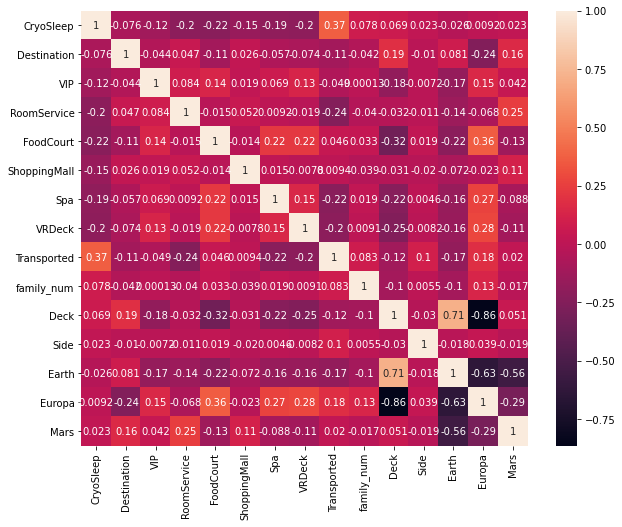

In [149]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(),annot=True)

# Model prediction

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold
from sklearn.metrics import f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler,RobustScaler

In [330]:
X=train_df.drop(columns=['Transported'],axis=1)
y=train_df['Transported'].values
y

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [332]:
X['Age_class']=X['Age_class'].astype('int')
test_df['Age_class']=test_df['Age_class'].astype('int')

In [71]:
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),
       ExtraTreesClassifier(),XGBClassifier(verbose=1),CatBoostClassifier(),LGBMClassifier()]

In [159]:
kf=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)

In [250]:
for model in models:
    prediction=[]
    accuracy=[]
    for train_idx,val_idx in kf.split(X,y):
        x_train=X.iloc[train_idx]
        y_train=y[train_idx]
        x_val=X.iloc[val_idx]
        y_val=y[val_idx]
        model.fit(x_train,y_train)
        pred=model.predict(x_val)
        prediction.append(pred)
        acc=accuracy_score(y_val.reshape(-1,1),pred)
        accuracy.append(acc)
    print(model," : ",np.mean(accuracy))
    

C:\Users\lg_gram\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lg_gram\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

LogisticRegression()  :  0.7829272408319002
DecisionTreeClassifier()  :  0.7411707057546002
RandomForestClassifier()  :  0.7923603965349184
GradientBoostingClassifier()  :  0.793281590480621
ExtraTreesClassifier()  :  0.7800526207474767
[20:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)  :  0.7956971686570394
Learning rate set to 0.023581
0:	learn: 0.6815865	total: 151ms	remaining: 2m 30s
1:	l

150:	learn: 0.4161636	total: 1.22s	remaining: 6.87s
151:	learn: 0.4160216	total: 1.23s	remaining: 6.86s
152:	learn: 0.4157907	total: 1.24s	remaining: 6.84s
153:	learn: 0.4155962	total: 1.25s	remaining: 6.84s
154:	learn: 0.4153760	total: 1.25s	remaining: 6.84s
155:	learn: 0.4151966	total: 1.26s	remaining: 6.84s
156:	learn: 0.4147853	total: 1.27s	remaining: 6.84s
157:	learn: 0.4145188	total: 1.28s	remaining: 6.83s
158:	learn: 0.4140777	total: 1.29s	remaining: 6.83s
159:	learn: 0.4139190	total: 1.3s	remaining: 6.83s
160:	learn: 0.4137333	total: 1.31s	remaining: 6.81s
161:	learn: 0.4134043	total: 1.31s	remaining: 6.79s
162:	learn: 0.4130758	total: 1.32s	remaining: 6.79s
163:	learn: 0.4128638	total: 1.33s	remaining: 6.77s
164:	learn: 0.4126001	total: 1.34s	remaining: 6.77s
165:	learn: 0.4124410	total: 1.34s	remaining: 6.76s
166:	learn: 0.4122269	total: 1.35s	remaining: 6.75s
167:	learn: 0.4119698	total: 1.36s	remaining: 6.74s
168:	learn: 0.4118253	total: 1.37s	remaining: 6.73s
169:	learn: 0

322:	learn: 0.3862599	total: 2.68s	remaining: 5.61s
323:	learn: 0.3860924	total: 2.68s	remaining: 5.6s
324:	learn: 0.3859881	total: 2.69s	remaining: 5.59s
325:	learn: 0.3858007	total: 2.7s	remaining: 5.58s
326:	learn: 0.3856864	total: 2.71s	remaining: 5.58s
327:	learn: 0.3855069	total: 2.71s	remaining: 5.56s
328:	learn: 0.3854131	total: 2.72s	remaining: 5.55s
329:	learn: 0.3853256	total: 2.73s	remaining: 5.54s
330:	learn: 0.3852402	total: 2.74s	remaining: 5.53s
331:	learn: 0.3851627	total: 2.74s	remaining: 5.52s
332:	learn: 0.3850438	total: 2.75s	remaining: 5.51s
333:	learn: 0.3849462	total: 2.76s	remaining: 5.5s
334:	learn: 0.3846220	total: 2.77s	remaining: 5.49s
335:	learn: 0.3845604	total: 2.78s	remaining: 5.49s
336:	learn: 0.3844472	total: 2.78s	remaining: 5.47s
337:	learn: 0.3843519	total: 2.79s	remaining: 5.46s
338:	learn: 0.3840008	total: 2.79s	remaining: 5.45s
339:	learn: 0.3839086	total: 2.8s	remaining: 5.44s
340:	learn: 0.3838157	total: 2.81s	remaining: 5.43s
341:	learn: 0.38

489:	learn: 0.3673326	total: 4.17s	remaining: 4.34s
490:	learn: 0.3672484	total: 4.18s	remaining: 4.33s
491:	learn: 0.3671111	total: 4.19s	remaining: 4.32s
492:	learn: 0.3669923	total: 4.19s	remaining: 4.31s
493:	learn: 0.3667642	total: 4.2s	remaining: 4.3s
494:	learn: 0.3666597	total: 4.21s	remaining: 4.29s
495:	learn: 0.3665902	total: 4.22s	remaining: 4.28s
496:	learn: 0.3664514	total: 4.22s	remaining: 4.27s
497:	learn: 0.3663234	total: 4.23s	remaining: 4.26s
498:	learn: 0.3662197	total: 4.24s	remaining: 4.25s
499:	learn: 0.3661606	total: 4.25s	remaining: 4.25s
500:	learn: 0.3660772	total: 4.25s	remaining: 4.24s
501:	learn: 0.3660309	total: 4.26s	remaining: 4.22s
502:	learn: 0.3659405	total: 4.27s	remaining: 4.22s
503:	learn: 0.3658215	total: 4.28s	remaining: 4.21s
504:	learn: 0.3656804	total: 4.29s	remaining: 4.21s
505:	learn: 0.3655524	total: 4.3s	remaining: 4.2s
506:	learn: 0.3654966	total: 4.31s	remaining: 4.19s
507:	learn: 0.3653658	total: 4.32s	remaining: 4.18s
508:	learn: 0.36

662:	learn: 0.3495493	total: 5.63s	remaining: 2.86s
663:	learn: 0.3494959	total: 5.64s	remaining: 2.85s
664:	learn: 0.3494326	total: 5.65s	remaining: 2.85s
665:	learn: 0.3493485	total: 5.66s	remaining: 2.84s
666:	learn: 0.3492765	total: 5.67s	remaining: 2.83s
667:	learn: 0.3491953	total: 5.68s	remaining: 2.82s
668:	learn: 0.3490772	total: 5.69s	remaining: 2.81s
669:	learn: 0.3490319	total: 5.7s	remaining: 2.81s
670:	learn: 0.3489498	total: 5.71s	remaining: 2.8s
671:	learn: 0.3488487	total: 5.71s	remaining: 2.79s
672:	learn: 0.3487608	total: 5.73s	remaining: 2.78s
673:	learn: 0.3486740	total: 5.73s	remaining: 2.77s
674:	learn: 0.3486030	total: 5.74s	remaining: 2.76s
675:	learn: 0.3484255	total: 5.75s	remaining: 2.76s
676:	learn: 0.3483061	total: 5.76s	remaining: 2.75s
677:	learn: 0.3482314	total: 5.77s	remaining: 2.74s
678:	learn: 0.3481334	total: 5.78s	remaining: 2.73s
679:	learn: 0.3480659	total: 5.79s	remaining: 2.73s
680:	learn: 0.3479705	total: 5.8s	remaining: 2.72s
681:	learn: 0.3

842:	learn: 0.3349095	total: 7.07s	remaining: 1.32s
843:	learn: 0.3348493	total: 7.07s	remaining: 1.31s
844:	learn: 0.3347849	total: 7.08s	remaining: 1.3s
845:	learn: 0.3347357	total: 7.09s	remaining: 1.29s
846:	learn: 0.3346987	total: 7.1s	remaining: 1.28s
847:	learn: 0.3346133	total: 7.11s	remaining: 1.27s
848:	learn: 0.3344912	total: 7.12s	remaining: 1.26s
849:	learn: 0.3344122	total: 7.13s	remaining: 1.26s
850:	learn: 0.3343399	total: 7.13s	remaining: 1.25s
851:	learn: 0.3342969	total: 7.14s	remaining: 1.24s
852:	learn: 0.3342474	total: 7.15s	remaining: 1.23s
853:	learn: 0.3341779	total: 7.16s	remaining: 1.22s
854:	learn: 0.3341291	total: 7.16s	remaining: 1.22s
855:	learn: 0.3340382	total: 7.17s	remaining: 1.21s
856:	learn: 0.3339920	total: 7.18s	remaining: 1.2s
857:	learn: 0.3339089	total: 7.18s	remaining: 1.19s
858:	learn: 0.3338361	total: 7.19s	remaining: 1.18s
859:	learn: 0.3337417	total: 7.2s	remaining: 1.17s
860:	learn: 0.3335943	total: 7.21s	remaining: 1.16s
861:	learn: 0.33

8:	learn: 0.6058819	total: 83.9ms	remaining: 9.24s
9:	learn: 0.5997419	total: 94.6ms	remaining: 9.37s
10:	learn: 0.5921572	total: 104ms	remaining: 9.34s
11:	learn: 0.5853570	total: 112ms	remaining: 9.21s
12:	learn: 0.5781262	total: 120ms	remaining: 9.12s
13:	learn: 0.5716004	total: 129ms	remaining: 9.11s
14:	learn: 0.5668467	total: 136ms	remaining: 8.93s
15:	learn: 0.5611917	total: 143ms	remaining: 8.8s
16:	learn: 0.5550717	total: 152ms	remaining: 8.78s
17:	learn: 0.5493506	total: 161ms	remaining: 8.79s
18:	learn: 0.5454364	total: 170ms	remaining: 8.76s
19:	learn: 0.5416941	total: 178ms	remaining: 8.7s
20:	learn: 0.5380547	total: 187ms	remaining: 8.74s
21:	learn: 0.5331621	total: 196ms	remaining: 8.7s
22:	learn: 0.5292485	total: 205ms	remaining: 8.71s
23:	learn: 0.5254581	total: 213ms	remaining: 8.67s
24:	learn: 0.5220101	total: 224ms	remaining: 8.72s
25:	learn: 0.5194660	total: 234ms	remaining: 8.75s
26:	learn: 0.5162549	total: 242ms	remaining: 8.72s
27:	learn: 0.5127853	total: 251ms	

169:	learn: 0.4061880	total: 1.36s	remaining: 6.62s
170:	learn: 0.4059707	total: 1.36s	remaining: 6.62s
171:	learn: 0.4058415	total: 1.37s	remaining: 6.61s
172:	learn: 0.4054498	total: 1.38s	remaining: 6.61s
173:	learn: 0.4052638	total: 1.39s	remaining: 6.6s
174:	learn: 0.4051062	total: 1.4s	remaining: 6.59s
175:	learn: 0.4049133	total: 1.41s	remaining: 6.58s
176:	learn: 0.4048116	total: 1.41s	remaining: 6.57s
177:	learn: 0.4044052	total: 1.42s	remaining: 6.57s
178:	learn: 0.4042481	total: 1.43s	remaining: 6.57s
179:	learn: 0.4040910	total: 1.44s	remaining: 6.56s
180:	learn: 0.4037670	total: 1.45s	remaining: 6.56s
181:	learn: 0.4035405	total: 1.46s	remaining: 6.55s
182:	learn: 0.4033971	total: 1.47s	remaining: 6.55s
183:	learn: 0.4032804	total: 1.48s	remaining: 6.54s
184:	learn: 0.4027759	total: 1.49s	remaining: 6.55s
185:	learn: 0.4024289	total: 1.5s	remaining: 6.55s
186:	learn: 0.4023093	total: 1.5s	remaining: 6.55s
187:	learn: 0.4021144	total: 1.52s	remaining: 6.56s
188:	learn: 0.40

332:	learn: 0.3803955	total: 2.62s	remaining: 5.25s
333:	learn: 0.3802484	total: 2.63s	remaining: 5.24s
334:	learn: 0.3801389	total: 2.63s	remaining: 5.23s
335:	learn: 0.3800499	total: 2.64s	remaining: 5.22s
336:	learn: 0.3799639	total: 2.65s	remaining: 5.22s
337:	learn: 0.3798568	total: 2.66s	remaining: 5.21s
338:	learn: 0.3797760	total: 2.67s	remaining: 5.2s
339:	learn: 0.3797211	total: 2.67s	remaining: 5.19s
340:	learn: 0.3796073	total: 2.68s	remaining: 5.18s
341:	learn: 0.3794463	total: 2.69s	remaining: 5.18s
342:	learn: 0.3792302	total: 2.7s	remaining: 5.17s
343:	learn: 0.3790968	total: 2.71s	remaining: 5.16s
344:	learn: 0.3790391	total: 2.71s	remaining: 5.15s
345:	learn: 0.3788980	total: 2.72s	remaining: 5.14s
346:	learn: 0.3787694	total: 2.73s	remaining: 5.13s
347:	learn: 0.3787076	total: 2.73s	remaining: 5.12s
348:	learn: 0.3785760	total: 2.74s	remaining: 5.11s
349:	learn: 0.3784822	total: 2.75s	remaining: 5.1s
350:	learn: 0.3783059	total: 2.75s	remaining: 5.09s
351:	learn: 0.3

494:	learn: 0.3633990	total: 3.85s	remaining: 3.92s
495:	learn: 0.3633117	total: 3.85s	remaining: 3.92s
496:	learn: 0.3632255	total: 3.86s	remaining: 3.91s
497:	learn: 0.3631717	total: 3.87s	remaining: 3.9s
498:	learn: 0.3630812	total: 3.88s	remaining: 3.9s
499:	learn: 0.3630148	total: 3.89s	remaining: 3.89s
500:	learn: 0.3629207	total: 3.9s	remaining: 3.88s
501:	learn: 0.3627884	total: 3.9s	remaining: 3.87s
502:	learn: 0.3627102	total: 3.91s	remaining: 3.87s
503:	learn: 0.3626381	total: 3.92s	remaining: 3.86s
504:	learn: 0.3625542	total: 3.93s	remaining: 3.85s
505:	learn: 0.3624637	total: 3.94s	remaining: 3.85s
506:	learn: 0.3623464	total: 3.95s	remaining: 3.84s
507:	learn: 0.3622949	total: 3.96s	remaining: 3.83s
508:	learn: 0.3622475	total: 3.97s	remaining: 3.83s
509:	learn: 0.3621698	total: 3.98s	remaining: 3.82s
510:	learn: 0.3620930	total: 3.99s	remaining: 3.82s
511:	learn: 0.3619195	total: 4s	remaining: 3.81s
512:	learn: 0.3618725	total: 4.01s	remaining: 3.8s
513:	learn: 0.361793

657:	learn: 0.3481043	total: 5.31s	remaining: 2.76s
658:	learn: 0.3480383	total: 5.32s	remaining: 2.75s
659:	learn: 0.3479697	total: 5.33s	remaining: 2.75s
660:	learn: 0.3478595	total: 5.34s	remaining: 2.74s
661:	learn: 0.3477228	total: 5.35s	remaining: 2.73s
662:	learn: 0.3475968	total: 5.36s	remaining: 2.72s
663:	learn: 0.3475115	total: 5.37s	remaining: 2.72s
664:	learn: 0.3474080	total: 5.38s	remaining: 2.71s
665:	learn: 0.3473240	total: 5.38s	remaining: 2.7s
666:	learn: 0.3472692	total: 5.39s	remaining: 2.69s
667:	learn: 0.3471459	total: 5.4s	remaining: 2.68s
668:	learn: 0.3469740	total: 5.41s	remaining: 2.68s
669:	learn: 0.3468137	total: 5.42s	remaining: 2.67s
670:	learn: 0.3466950	total: 5.43s	remaining: 2.66s
671:	learn: 0.3465643	total: 5.44s	remaining: 2.65s
672:	learn: 0.3465127	total: 5.45s	remaining: 2.65s
673:	learn: 0.3464116	total: 5.46s	remaining: 2.64s
674:	learn: 0.3463188	total: 5.47s	remaining: 2.63s
675:	learn: 0.3462514	total: 5.48s	remaining: 2.63s
676:	learn: 0.

832:	learn: 0.3335328	total: 6.95s	remaining: 1.39s
833:	learn: 0.3334798	total: 6.96s	remaining: 1.39s
834:	learn: 0.3333968	total: 6.97s	remaining: 1.38s
835:	learn: 0.3333342	total: 6.98s	remaining: 1.37s
836:	learn: 0.3332108	total: 6.99s	remaining: 1.36s
837:	learn: 0.3331688	total: 7s	remaining: 1.35s
838:	learn: 0.3331264	total: 7.01s	remaining: 1.34s
839:	learn: 0.3330860	total: 7.02s	remaining: 1.34s
840:	learn: 0.3330331	total: 7.03s	remaining: 1.33s
841:	learn: 0.3329426	total: 7.04s	remaining: 1.32s
842:	learn: 0.3328611	total: 7.05s	remaining: 1.31s
843:	learn: 0.3327366	total: 7.06s	remaining: 1.3s
844:	learn: 0.3326446	total: 7.07s	remaining: 1.3s
845:	learn: 0.3325483	total: 7.08s	remaining: 1.29s
846:	learn: 0.3325190	total: 7.08s	remaining: 1.28s
847:	learn: 0.3324650	total: 7.09s	remaining: 1.27s
848:	learn: 0.3323511	total: 7.1s	remaining: 1.26s
849:	learn: 0.3322734	total: 7.11s	remaining: 1.25s
850:	learn: 0.3322119	total: 7.12s	remaining: 1.25s
851:	learn: 0.3321

994:	learn: 0.3215063	total: 8.44s	remaining: 42.4ms
995:	learn: 0.3214365	total: 8.45s	remaining: 34ms
996:	learn: 0.3213991	total: 8.46s	remaining: 25.5ms
997:	learn: 0.3212913	total: 8.47s	remaining: 17ms
998:	learn: 0.3212159	total: 8.48s	remaining: 8.49ms
999:	learn: 0.3211676	total: 8.49s	remaining: 0us
Learning rate set to 0.023581
0:	learn: 0.6819842	total: 10.3ms	remaining: 10.3s
1:	learn: 0.6711613	total: 20.5ms	remaining: 10.2s
2:	learn: 0.6612611	total: 30.4ms	remaining: 10.1s
3:	learn: 0.6507651	total: 39.9ms	remaining: 9.94s
4:	learn: 0.6412809	total: 50.7ms	remaining: 10.1s
5:	learn: 0.6325234	total: 61.4ms	remaining: 10.2s
6:	learn: 0.6236782	total: 72.6ms	remaining: 10.3s
7:	learn: 0.6172616	total: 82.3ms	remaining: 10.2s
8:	learn: 0.6092646	total: 92ms	remaining: 10.1s
9:	learn: 0.6034585	total: 97.1ms	remaining: 9.61s
10:	learn: 0.5960265	total: 105ms	remaining: 9.44s
11:	learn: 0.5893013	total: 114ms	remaining: 9.36s
12:	learn: 0.5821749	total: 124ms	remaining: 9.39

172:	learn: 0.4097743	total: 1.34s	remaining: 6.39s
173:	learn: 0.4096355	total: 1.35s	remaining: 6.39s
174:	learn: 0.4094687	total: 1.35s	remaining: 6.38s
175:	learn: 0.4092997	total: 1.36s	remaining: 6.38s
176:	learn: 0.4090809	total: 1.37s	remaining: 6.38s
177:	learn: 0.4089372	total: 1.38s	remaining: 6.39s
178:	learn: 0.4087817	total: 1.39s	remaining: 6.39s
179:	learn: 0.4085843	total: 1.4s	remaining: 6.38s
180:	learn: 0.4080147	total: 1.41s	remaining: 6.39s
181:	learn: 0.4077923	total: 1.42s	remaining: 6.38s
182:	learn: 0.4076219	total: 1.43s	remaining: 6.38s
183:	learn: 0.4074580	total: 1.44s	remaining: 6.38s
184:	learn: 0.4069282	total: 1.45s	remaining: 6.39s
185:	learn: 0.4066640	total: 1.46s	remaining: 6.4s
186:	learn: 0.4064776	total: 1.47s	remaining: 6.39s
187:	learn: 0.4063072	total: 1.48s	remaining: 6.38s
188:	learn: 0.4059366	total: 1.48s	remaining: 6.37s
189:	learn: 0.4058288	total: 1.49s	remaining: 6.37s
190:	learn: 0.4056451	total: 1.5s	remaining: 6.36s
191:	learn: 0.4

333:	learn: 0.3846625	total: 2.8s	remaining: 5.59s
334:	learn: 0.3845727	total: 2.81s	remaining: 5.58s
335:	learn: 0.3844947	total: 2.82s	remaining: 5.57s
336:	learn: 0.3844387	total: 2.83s	remaining: 5.57s
337:	learn: 0.3843028	total: 2.84s	remaining: 5.56s
338:	learn: 0.3842473	total: 2.85s	remaining: 5.55s
339:	learn: 0.3841599	total: 2.86s	remaining: 5.54s
340:	learn: 0.3840783	total: 2.87s	remaining: 5.54s
341:	learn: 0.3839824	total: 2.88s	remaining: 5.53s
342:	learn: 0.3838635	total: 2.88s	remaining: 5.53s
343:	learn: 0.3837112	total: 2.9s	remaining: 5.52s
344:	learn: 0.3835730	total: 2.9s	remaining: 5.51s
345:	learn: 0.3834487	total: 2.91s	remaining: 5.51s
346:	learn: 0.3834040	total: 2.92s	remaining: 5.5s
347:	learn: 0.3833356	total: 2.93s	remaining: 5.49s
348:	learn: 0.3832318	total: 2.94s	remaining: 5.48s
349:	learn: 0.3830985	total: 2.95s	remaining: 5.47s
350:	learn: 0.3829753	total: 2.96s	remaining: 5.47s
351:	learn: 0.3829000	total: 2.97s	remaining: 5.46s
352:	learn: 0.38

505:	learn: 0.3663661	total: 4.27s	remaining: 4.17s
506:	learn: 0.3662589	total: 4.28s	remaining: 4.16s
507:	learn: 0.3660943	total: 4.29s	remaining: 4.15s
508:	learn: 0.3660382	total: 4.29s	remaining: 4.14s
509:	learn: 0.3659629	total: 4.3s	remaining: 4.13s
510:	learn: 0.3658685	total: 4.31s	remaining: 4.13s
511:	learn: 0.3657723	total: 4.32s	remaining: 4.12s
512:	learn: 0.3657031	total: 4.32s	remaining: 4.11s
513:	learn: 0.3655083	total: 4.33s	remaining: 4.09s
514:	learn: 0.3653742	total: 4.34s	remaining: 4.08s
515:	learn: 0.3652489	total: 4.34s	remaining: 4.08s
516:	learn: 0.3651790	total: 4.35s	remaining: 4.07s
517:	learn: 0.3650970	total: 4.36s	remaining: 4.06s
518:	learn: 0.3649576	total: 4.37s	remaining: 4.05s
519:	learn: 0.3648130	total: 4.38s	remaining: 4.04s
520:	learn: 0.3647083	total: 4.38s	remaining: 4.03s
521:	learn: 0.3646622	total: 4.39s	remaining: 4.02s
522:	learn: 0.3644846	total: 4.4s	remaining: 4.02s
523:	learn: 0.3643318	total: 4.41s	remaining: 4.01s
524:	learn: 0.

671:	learn: 0.3495161	total: 5.77s	remaining: 2.81s
672:	learn: 0.3494078	total: 5.78s	remaining: 2.81s
673:	learn: 0.3492862	total: 5.78s	remaining: 2.8s
674:	learn: 0.3491732	total: 5.79s	remaining: 2.79s
675:	learn: 0.3490565	total: 5.8s	remaining: 2.78s
676:	learn: 0.3489615	total: 5.81s	remaining: 2.77s
677:	learn: 0.3488867	total: 5.82s	remaining: 2.76s
678:	learn: 0.3487486	total: 5.83s	remaining: 2.75s
679:	learn: 0.3486646	total: 5.83s	remaining: 2.74s
680:	learn: 0.3486067	total: 5.84s	remaining: 2.73s
681:	learn: 0.3485008	total: 5.85s	remaining: 2.73s
682:	learn: 0.3484451	total: 5.85s	remaining: 2.72s
683:	learn: 0.3483181	total: 5.86s	remaining: 2.71s
684:	learn: 0.3482864	total: 5.87s	remaining: 2.7s
685:	learn: 0.3481401	total: 5.88s	remaining: 2.69s
686:	learn: 0.3480202	total: 5.89s	remaining: 2.68s
687:	learn: 0.3479205	total: 5.89s	remaining: 2.67s
688:	learn: 0.3478007	total: 5.9s	remaining: 2.67s
689:	learn: 0.3476039	total: 5.91s	remaining: 2.66s
690:	learn: 0.34

850:	learn: 0.3341649	total: 7.18s	remaining: 1.26s
851:	learn: 0.3341117	total: 7.19s	remaining: 1.25s
852:	learn: 0.3340080	total: 7.19s	remaining: 1.24s
853:	learn: 0.3338114	total: 7.22s	remaining: 1.23s
854:	learn: 0.3337533	total: 7.23s	remaining: 1.23s
855:	learn: 0.3336639	total: 7.24s	remaining: 1.22s
856:	learn: 0.3335411	total: 7.25s	remaining: 1.21s
857:	learn: 0.3334832	total: 7.26s	remaining: 1.2s
858:	learn: 0.3333327	total: 7.26s	remaining: 1.19s
859:	learn: 0.3332338	total: 7.28s	remaining: 1.18s
860:	learn: 0.3331362	total: 7.29s	remaining: 1.18s
861:	learn: 0.3330689	total: 7.29s	remaining: 1.17s
862:	learn: 0.3329476	total: 7.3s	remaining: 1.16s
863:	learn: 0.3328640	total: 7.31s	remaining: 1.15s
864:	learn: 0.3327832	total: 7.32s	remaining: 1.14s
865:	learn: 0.3326994	total: 7.33s	remaining: 1.13s
866:	learn: 0.3326210	total: 7.34s	remaining: 1.13s
867:	learn: 0.3325399	total: 7.35s	remaining: 1.12s
868:	learn: 0.3324379	total: 7.36s	remaining: 1.11s
869:	learn: 0.

22:	learn: 0.5322627	total: 214ms	remaining: 9.1s
23:	learn: 0.5284685	total: 224ms	remaining: 9.13s
24:	learn: 0.5252661	total: 234ms	remaining: 9.11s
25:	learn: 0.5225158	total: 243ms	remaining: 9.1s
26:	learn: 0.5196290	total: 254ms	remaining: 9.17s
27:	learn: 0.5163543	total: 266ms	remaining: 9.22s
28:	learn: 0.5143554	total: 275ms	remaining: 9.21s
29:	learn: 0.5120974	total: 286ms	remaining: 9.23s
30:	learn: 0.5091385	total: 294ms	remaining: 9.2s
31:	learn: 0.5066085	total: 304ms	remaining: 9.21s
32:	learn: 0.5045734	total: 313ms	remaining: 9.18s
33:	learn: 0.5026879	total: 323ms	remaining: 9.18s
34:	learn: 0.5002094	total: 332ms	remaining: 9.16s
35:	learn: 0.4977763	total: 341ms	remaining: 9.13s
36:	learn: 0.4961846	total: 352ms	remaining: 9.16s
37:	learn: 0.4938739	total: 362ms	remaining: 9.17s
38:	learn: 0.4922495	total: 371ms	remaining: 9.15s
39:	learn: 0.4908486	total: 380ms	remaining: 9.13s
40:	learn: 0.4885916	total: 389ms	remaining: 9.1s
41:	learn: 0.4869598	total: 400ms	r

200:	learn: 0.4004337	total: 1.88s	remaining: 7.47s
201:	learn: 0.4003086	total: 1.89s	remaining: 7.46s
202:	learn: 0.4000535	total: 1.9s	remaining: 7.44s
203:	learn: 0.3996971	total: 1.9s	remaining: 7.43s
204:	learn: 0.3995659	total: 1.91s	remaining: 7.4s
205:	learn: 0.3994529	total: 1.92s	remaining: 7.38s
206:	learn: 0.3992984	total: 1.92s	remaining: 7.37s
207:	learn: 0.3991508	total: 1.93s	remaining: 7.35s
208:	learn: 0.3989779	total: 1.94s	remaining: 7.34s
209:	learn: 0.3988702	total: 1.95s	remaining: 7.33s
210:	learn: 0.3987476	total: 1.96s	remaining: 7.33s
211:	learn: 0.3985752	total: 1.97s	remaining: 7.31s
212:	learn: 0.3984180	total: 1.98s	remaining: 7.3s
213:	learn: 0.3981680	total: 1.98s	remaining: 7.28s
214:	learn: 0.3980542	total: 1.99s	remaining: 7.27s
215:	learn: 0.3979668	total: 2s	remaining: 7.25s
216:	learn: 0.3978515	total: 2.01s	remaining: 7.24s
217:	learn: 0.3976530	total: 2.01s	remaining: 7.22s
218:	learn: 0.3974475	total: 2.02s	remaining: 7.21s
219:	learn: 0.39730

368:	learn: 0.3775463	total: 3.32s	remaining: 5.67s
369:	learn: 0.3774152	total: 3.33s	remaining: 5.67s
370:	learn: 0.3773500	total: 3.34s	remaining: 5.66s
371:	learn: 0.3773366	total: 3.35s	remaining: 5.65s
372:	learn: 0.3772146	total: 3.35s	remaining: 5.64s
373:	learn: 0.3771458	total: 3.36s	remaining: 5.63s
374:	learn: 0.3770563	total: 3.37s	remaining: 5.62s
375:	learn: 0.3769787	total: 3.38s	remaining: 5.61s
376:	learn: 0.3769024	total: 3.39s	remaining: 5.6s
377:	learn: 0.3768004	total: 3.4s	remaining: 5.6s
378:	learn: 0.3767449	total: 3.41s	remaining: 5.59s
379:	learn: 0.3766316	total: 3.42s	remaining: 5.58s
380:	learn: 0.3764961	total: 3.43s	remaining: 5.58s
381:	learn: 0.3764181	total: 3.44s	remaining: 5.57s
382:	learn: 0.3762244	total: 3.45s	remaining: 5.56s
383:	learn: 0.3761428	total: 3.46s	remaining: 5.55s
384:	learn: 0.3760317	total: 3.47s	remaining: 5.54s
385:	learn: 0.3757548	total: 3.48s	remaining: 5.54s
386:	learn: 0.3756112	total: 3.5s	remaining: 5.54s
387:	learn: 0.37

538:	learn: 0.3597762	total: 4.76s	remaining: 4.07s
539:	learn: 0.3596737	total: 4.76s	remaining: 4.06s
540:	learn: 0.3595171	total: 4.77s	remaining: 4.05s
541:	learn: 0.3593643	total: 4.78s	remaining: 4.04s
542:	learn: 0.3593065	total: 4.79s	remaining: 4.03s
543:	learn: 0.3591684	total: 4.79s	remaining: 4.02s
544:	learn: 0.3590093	total: 4.8s	remaining: 4.01s
545:	learn: 0.3589387	total: 4.81s	remaining: 4s
546:	learn: 0.3588633	total: 4.81s	remaining: 3.98s
547:	learn: 0.3586618	total: 4.82s	remaining: 3.97s
548:	learn: 0.3585679	total: 4.82s	remaining: 3.96s
549:	learn: 0.3584089	total: 4.83s	remaining: 3.95s
550:	learn: 0.3583621	total: 4.84s	remaining: 3.94s
551:	learn: 0.3582616	total: 4.85s	remaining: 3.93s
552:	learn: 0.3581316	total: 4.86s	remaining: 3.92s
553:	learn: 0.3580619	total: 4.86s	remaining: 3.92s
554:	learn: 0.3579447	total: 4.87s	remaining: 3.91s
555:	learn: 0.3578876	total: 4.88s	remaining: 3.9s
556:	learn: 0.3577819	total: 4.89s	remaining: 3.89s
557:	learn: 0.357

715:	learn: 0.3429742	total: 6.23s	remaining: 2.47s
716:	learn: 0.3428046	total: 6.24s	remaining: 2.46s
717:	learn: 0.3426926	total: 6.25s	remaining: 2.45s
718:	learn: 0.3426061	total: 6.26s	remaining: 2.45s
719:	learn: 0.3424307	total: 6.27s	remaining: 2.44s
720:	learn: 0.3423844	total: 6.27s	remaining: 2.43s
721:	learn: 0.3422683	total: 6.28s	remaining: 2.42s
722:	learn: 0.3421418	total: 6.29s	remaining: 2.41s
723:	learn: 0.3420424	total: 6.3s	remaining: 2.4s
724:	learn: 0.3419489	total: 6.3s	remaining: 2.39s
725:	learn: 0.3418428	total: 6.31s	remaining: 2.38s
726:	learn: 0.3417813	total: 6.32s	remaining: 2.37s
727:	learn: 0.3416445	total: 6.33s	remaining: 2.37s
728:	learn: 0.3415826	total: 6.34s	remaining: 2.36s
729:	learn: 0.3414717	total: 6.35s	remaining: 2.35s
730:	learn: 0.3414055	total: 6.36s	remaining: 2.34s
731:	learn: 0.3413366	total: 6.37s	remaining: 2.33s
732:	learn: 0.3411668	total: 6.4s	remaining: 2.33s
733:	learn: 0.3411111	total: 6.41s	remaining: 2.32s
734:	learn: 0.34

876:	learn: 0.3289586	total: 7.53s	remaining: 1.06s
877:	learn: 0.3288905	total: 7.54s	remaining: 1.05s
878:	learn: 0.3287901	total: 7.55s	remaining: 1.04s
879:	learn: 0.3286933	total: 7.55s	remaining: 1.03s
880:	learn: 0.3286117	total: 7.56s	remaining: 1.02s
881:	learn: 0.3285098	total: 7.57s	remaining: 1.01s
882:	learn: 0.3284191	total: 7.58s	remaining: 1s
883:	learn: 0.3283079	total: 7.58s	remaining: 995ms
884:	learn: 0.3282023	total: 7.59s	remaining: 986ms
885:	learn: 0.3281014	total: 7.6s	remaining: 977ms
886:	learn: 0.3280498	total: 7.6s	remaining: 969ms
887:	learn: 0.3280083	total: 7.61s	remaining: 960ms
888:	learn: 0.3279143	total: 7.62s	remaining: 951ms
889:	learn: 0.3278720	total: 7.63s	remaining: 943ms
890:	learn: 0.3277162	total: 7.63s	remaining: 934ms
891:	learn: 0.3276298	total: 7.64s	remaining: 926ms
892:	learn: 0.3275257	total: 7.65s	remaining: 917ms
893:	learn: 0.3274686	total: 7.66s	remaining: 908ms
894:	learn: 0.3272945	total: 7.67s	remaining: 900ms
895:	learn: 0.327

51:	learn: 0.4725087	total: 372ms	remaining: 6.79s
52:	learn: 0.4714268	total: 378ms	remaining: 6.75s
53:	learn: 0.4704867	total: 384ms	remaining: 6.72s
54:	learn: 0.4691637	total: 390ms	remaining: 6.69s
55:	learn: 0.4671793	total: 396ms	remaining: 6.68s
56:	learn: 0.4659109	total: 404ms	remaining: 6.68s
57:	learn: 0.4650081	total: 410ms	remaining: 6.66s
58:	learn: 0.4636423	total: 415ms	remaining: 6.63s
59:	learn: 0.4627766	total: 421ms	remaining: 6.6s
60:	learn: 0.4619102	total: 426ms	remaining: 6.56s
61:	learn: 0.4610250	total: 431ms	remaining: 6.53s
62:	learn: 0.4599577	total: 439ms	remaining: 6.53s
63:	learn: 0.4589443	total: 445ms	remaining: 6.51s
64:	learn: 0.4578839	total: 452ms	remaining: 6.5s
65:	learn: 0.4566899	total: 460ms	remaining: 6.51s
66:	learn: 0.4558642	total: 468ms	remaining: 6.52s
67:	learn: 0.4549376	total: 477ms	remaining: 6.54s
68:	learn: 0.4542940	total: 484ms	remaining: 6.53s
69:	learn: 0.4535165	total: 492ms	remaining: 6.54s
70:	learn: 0.4530262	total: 499ms

216:	learn: 0.3981977	total: 1.81s	remaining: 6.54s
217:	learn: 0.3977409	total: 1.82s	remaining: 6.53s
218:	learn: 0.3975245	total: 1.83s	remaining: 6.52s
219:	learn: 0.3974163	total: 1.84s	remaining: 6.52s
220:	learn: 0.3971983	total: 1.85s	remaining: 6.51s
221:	learn: 0.3970565	total: 1.86s	remaining: 6.51s
222:	learn: 0.3968997	total: 1.87s	remaining: 6.51s
223:	learn: 0.3967073	total: 1.88s	remaining: 6.5s
224:	learn: 0.3964411	total: 1.88s	remaining: 6.49s
225:	learn: 0.3962501	total: 1.9s	remaining: 6.49s
226:	learn: 0.3961053	total: 1.9s	remaining: 6.48s
227:	learn: 0.3959606	total: 1.91s	remaining: 6.48s
228:	learn: 0.3957791	total: 1.92s	remaining: 6.47s
229:	learn: 0.3956055	total: 1.93s	remaining: 6.46s
230:	learn: 0.3954367	total: 1.94s	remaining: 6.47s
231:	learn: 0.3953367	total: 1.95s	remaining: 6.46s
232:	learn: 0.3952724	total: 1.96s	remaining: 6.45s
233:	learn: 0.3951776	total: 1.97s	remaining: 6.45s
234:	learn: 0.3949719	total: 1.98s	remaining: 6.44s
235:	learn: 0.3

379:	learn: 0.3764577	total: 3.32s	remaining: 5.42s
380:	learn: 0.3763560	total: 3.33s	remaining: 5.41s
381:	learn: 0.3762749	total: 3.34s	remaining: 5.4s
382:	learn: 0.3761855	total: 3.35s	remaining: 5.39s
383:	learn: 0.3761103	total: 3.36s	remaining: 5.38s
384:	learn: 0.3759765	total: 3.37s	remaining: 5.38s
385:	learn: 0.3758776	total: 3.38s	remaining: 5.37s
386:	learn: 0.3757711	total: 3.39s	remaining: 5.36s
387:	learn: 0.3756123	total: 3.39s	remaining: 5.35s
388:	learn: 0.3753286	total: 3.4s	remaining: 5.35s
389:	learn: 0.3752490	total: 3.41s	remaining: 5.34s
390:	learn: 0.3751349	total: 3.42s	remaining: 5.33s
391:	learn: 0.3750011	total: 3.43s	remaining: 5.32s
392:	learn: 0.3749519	total: 3.44s	remaining: 5.32s
393:	learn: 0.3748499	total: 3.45s	remaining: 5.31s
394:	learn: 0.3747537	total: 3.46s	remaining: 5.3s
395:	learn: 0.3746514	total: 3.47s	remaining: 5.3s
396:	learn: 0.3745733	total: 3.48s	remaining: 5.29s
397:	learn: 0.3744411	total: 3.49s	remaining: 5.28s
398:	learn: 0.37

540:	learn: 0.3593878	total: 4.79s	remaining: 4.06s
541:	learn: 0.3592381	total: 4.8s	remaining: 4.05s
542:	learn: 0.3591799	total: 4.81s	remaining: 4.05s
543:	learn: 0.3590738	total: 4.82s	remaining: 4.04s
544:	learn: 0.3590064	total: 4.83s	remaining: 4.03s
545:	learn: 0.3589439	total: 4.83s	remaining: 4.02s
546:	learn: 0.3588059	total: 4.84s	remaining: 4.01s
547:	learn: 0.3586999	total: 4.85s	remaining: 4s
548:	learn: 0.3585626	total: 4.86s	remaining: 3.99s
549:	learn: 0.3585031	total: 4.87s	remaining: 3.99s
550:	learn: 0.3584189	total: 4.88s	remaining: 3.98s
551:	learn: 0.3582623	total: 4.89s	remaining: 3.97s
552:	learn: 0.3582023	total: 4.9s	remaining: 3.96s
553:	learn: 0.3580970	total: 4.91s	remaining: 3.95s
554:	learn: 0.3580008	total: 4.92s	remaining: 3.95s
555:	learn: 0.3578475	total: 4.93s	remaining: 3.94s
556:	learn: 0.3577623	total: 4.94s	remaining: 3.93s
557:	learn: 0.3576221	total: 4.95s	remaining: 3.92s
558:	learn: 0.3575681	total: 4.96s	remaining: 3.91s
559:	learn: 0.357

699:	learn: 0.3441971	total: 6.28s	remaining: 2.69s
700:	learn: 0.3440689	total: 6.28s	remaining: 2.68s
701:	learn: 0.3440352	total: 6.29s	remaining: 2.67s
702:	learn: 0.3439522	total: 6.29s	remaining: 2.66s
703:	learn: 0.3438872	total: 6.3s	remaining: 2.65s
704:	learn: 0.3438079	total: 6.3s	remaining: 2.64s
705:	learn: 0.3437395	total: 6.31s	remaining: 2.63s
706:	learn: 0.3436309	total: 6.31s	remaining: 2.62s
707:	learn: 0.3435916	total: 6.32s	remaining: 2.6s
708:	learn: 0.3434311	total: 6.32s	remaining: 2.59s
709:	learn: 0.3433149	total: 6.33s	remaining: 2.58s
710:	learn: 0.3432319	total: 6.33s	remaining: 2.57s
711:	learn: 0.3431930	total: 6.33s	remaining: 2.56s
712:	learn: 0.3431264	total: 6.34s	remaining: 2.55s
713:	learn: 0.3429903	total: 6.34s	remaining: 2.54s
714:	learn: 0.3429577	total: 6.35s	remaining: 2.53s
715:	learn: 0.3428453	total: 6.35s	remaining: 2.52s
716:	learn: 0.3427492	total: 6.36s	remaining: 2.51s
717:	learn: 0.3426173	total: 6.36s	remaining: 2.5s
718:	learn: 0.34

874:	learn: 0.3294707	total: 7.77s	remaining: 1.11s
875:	learn: 0.3294375	total: 7.78s	remaining: 1.1s
876:	learn: 0.3293766	total: 7.79s	remaining: 1.09s
877:	learn: 0.3292991	total: 7.8s	remaining: 1.08s
878:	learn: 0.3292193	total: 7.8s	remaining: 1.07s
879:	learn: 0.3291341	total: 7.81s	remaining: 1.06s
880:	learn: 0.3290869	total: 7.82s	remaining: 1.06s
881:	learn: 0.3289646	total: 7.83s	remaining: 1.05s
882:	learn: 0.3288643	total: 7.84s	remaining: 1.04s
883:	learn: 0.3288055	total: 7.85s	remaining: 1.03s
884:	learn: 0.3287557	total: 7.86s	remaining: 1.02s
885:	learn: 0.3287111	total: 7.87s	remaining: 1.01s
886:	learn: 0.3285843	total: 7.87s	remaining: 1s
887:	learn: 0.3285053	total: 7.88s	remaining: 994ms
888:	learn: 0.3284567	total: 7.89s	remaining: 985ms
889:	learn: 0.3283279	total: 7.9s	remaining: 976ms
890:	learn: 0.3282183	total: 7.91s	remaining: 967ms
891:	learn: 0.3281165	total: 7.92s	remaining: 959ms
892:	learn: 0.3280904	total: 7.92s	remaining: 949ms
893:	learn: 0.32796

- Catboost,Xgboost,LGBM have the higher scores than other models. So I'm gonna tune hyperparameters of the 3 models

In [376]:
accuracy=[]
for train_idx,val_idx in kf.split(X,y):
        x_train=X.iloc[train_idx]
        y_train=y[train_idx]
        x_val=X.iloc[val_idx]
        y_val=y[val_idx]
        catboost=CatBoostClassifier(learning_rate= 0.06,max_depth= 6, n_estimators=300,random_seed= 2,verbose= 50)
        catboost.fit(x_train,y_train)
        pred=catboost.predict(x_val)
        acc=accuracy_score(y_val.reshape(-1,1),pred)
        accuracy.append(acc)
print(model," : ",np.mean(accuracy))
    

CatBoostError: Bad value for num_feature[non_default_doc_idx=80,feature_idx=9]="B": Cannot convert 'b'B'' to float

In [234]:
#catboostclassifier
catboost=CatBoostClassifier(learning_rate= 0.06,max_depth= 6, n_estimators=300,random_seed= 2,verbose= 50)
catboost.fit(X,y)

0:	learn: 0.6636299	total: 4.32ms	remaining: 1.29s
50:	learn: 0.4220685	total: 215ms	remaining: 1.05s
100:	learn: 0.3953840	total: 416ms	remaining: 819ms
150:	learn: 0.3794861	total: 635ms	remaining: 626ms
200:	learn: 0.3680649	total: 859ms	remaining: 423ms
250:	learn: 0.3559645	total: 1.15s	remaining: 225ms
299:	learn: 0.3460664	total: 1.39s	remaining: 0us


In [337]:
for train_idx,val_idx in kf.split(X,y):
        x_train=X.iloc[train_idx]
        y_train=y[train_idx]
        x_val=X.iloc[val_idx]
        y_val=y[val_idx]
        lgbm=LGBMClassifier(boosting_type='dart', colsample_bytree=0.7999999999999999,
               feature_fraction=0.9, learning_rate=0.09, max_depth=6,
               objective='binary', random_state=42, subsample=0.1) 
        lgbm.fit(x_train,y_train,early_stopping_rounds=100,verbose=False)
        pred=lgbm.predict(x_val)
        acc=accuracy_score(y_val.reshape(-1,1),pred)
        accuracy.append(acc)
print(model," : ",np.mean(accuracy))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
LGBMClassifier(boosting_type='dart', colsample_bytree=0.7999999999999999,
               feature_fraction=0.9, learning_rate=0.09, max_depth=6,
               objective='binary', random_state=42, subsample=0.1)  :  0.7994548008822181


In [338]:
lgbm.fit(X,y)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9


LGBMClassifier(boosting_type='dart', colsample_bytree=0.7999999999999999,
               feature_fraction=0.9, learning_rate=0.09, max_depth=6,
               objective='binary', random_state=42, subsample=0.1)

<BarContainer object of 15 artists>

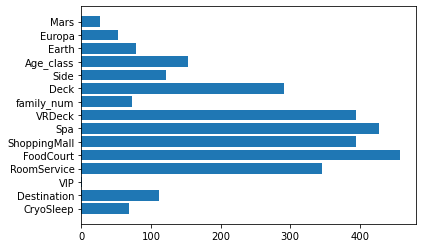

In [201]:
plt.barh(X.columns,lgbm.feature_importances_)

In [260]:
accuracy=[]
for train_idx,val_idx in kf.split(X,y):
        x_train=X.iloc[train_idx]
        y_train=y[train_idx]
        x_val=X.iloc[val_idx]
        y_val=y[val_idx]
        xgb=XGBClassifier(boosting_type='dart',colsample_bylevel= 0.3,gamma= 6,learning_rate=0.11,max_depth= 8,
  min_child_weight=0.1,n_estimators=100,objective='binary:logistic',subsample=0.7) 
        xgb.fit(x_train,y_train)
        pred=xgb.predict(x_val)
        acc=accuracy_score(y_val.reshape(-1,1),pred)
        accuracy.append(acc)
print(model," : ",np.mean(accuracy))

[00:22:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:22:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:22:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

In [294]:
xgbl.fit(X,y)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[20:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', boosting_type='dart',
              colsample_bylevel=0.3, colsample_bynode=1, colsample_bytree=1,
              gamma=6, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.11, max_delta_step=0,
              max_depth=8, min_child_weight=0.1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

<BarContainer object of 15 artists>

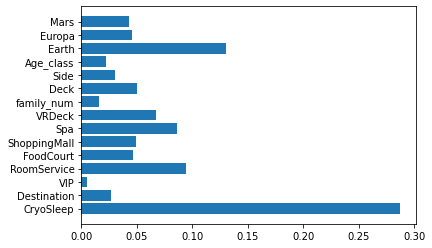

In [268]:
plt.barh(X.columns,xgb.feature_importances_)

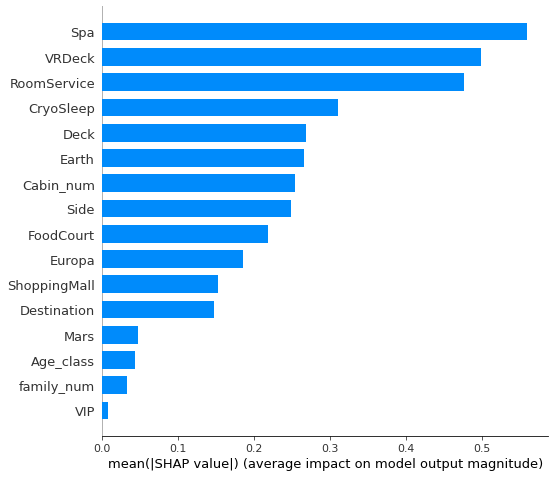

In [261]:
import shap
shap_values=shap.TreeExplainer(xgb).shap_values(X)
shap.summary_plot(shap_values,X,plot_type='bar')

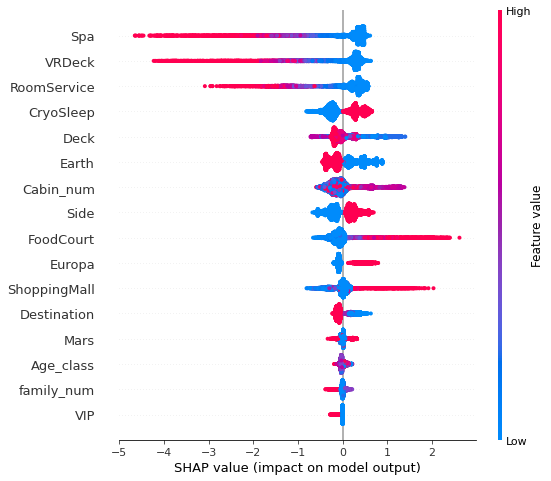

In [262]:
shap.summary_plot(shap_values,X)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


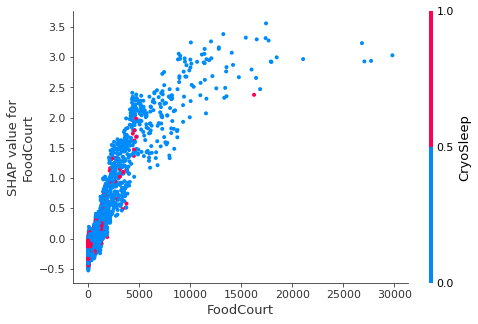

In [299]:
shap.dependence_plot("FoodCourt",shap_values,X)

In [280]:
#stacking
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import cross_val_score
clf1 = XGBClassifier(boosting_type='dart',colsample_bylevel= 0.3,gamma= 6,learning_rate=0.11,max_depth= 8,
  min_child_weight=0.1,n_estimators=100,objective='binary:logistic',subsample=0.7)
clf2 = LGBMClassifier(boosting_type='dart', colsample_bytree=0.7999999999999999,
               feature_fraction=0.9, learning_rate=0.09, max_depth=6,
               objective='binary', random_state=42, subsample=0.1) 
clf3 = CatBoostClassifier(learning_rate= 0.06,max_depth= 6, n_estimators=300,random_seed= 42,verbose= 50)

sclf = StackingCVClassifier(classifiers=[clf1, clf3],
                            meta_classifier=clf2,
                            random_state=42)


for clf, label in zip([clf1, clf2, clf3,sclf], 
                      ['xgboost', 
                       'lgbm', 
                       'catboost',
                       'StackingClassifier']):

    scores = cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:13:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.80 (+/- 0.01) [xgboost]
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: featur

C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:13:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6623669	total: 3.47ms	remaining: 1.04s
50:	learn: 0.3962436	total: 163ms	remaining: 796ms
100:	learn: 0.3599990	total: 359ms	remaining: 708ms
150:	learn: 0.3342054	total: 545ms	remaining: 538ms
200:	learn: 0.3097070	total: 687ms	remaining: 338ms
250:	learn: 0.2907867	total: 854ms	remain

C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0:	learn: 0.6623105	total: 9.55ms	remaining: 2.85s
50:	learn: 0.4097754	total: 189ms	remaining: 925ms
100:	learn: 0.3781153	total: 380ms	remaining: 749ms
150:	learn: 0.3593050	total: 574ms	remaining: 566ms
200:	learn: 0.3424219	total: 762ms	remaining: 375ms
250:	learn: 0.3283311	total: 975ms	remaining: 190ms
299:	learn: 0.3165681	total: 1.2s	remaining: 0us
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[18:13:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:13:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting 

C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:13:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6632853	total: 3.78ms	remaining: 1.13s
50:	learn: 0.4015236	total: 159ms	remaining: 774ms
100:	learn: 0.3665755	total: 342ms	remaining: 674ms
150:	learn: 0.3417680	total: 526ms	remaining: 519ms
200:	learn: 0.3202745	total: 680ms	remaining: 335ms
250:	learn: 0.3015732	total: 822ms	remain

C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0:	learn: 0.6659118	total: 6.87ms	remaining: 2.05s
50:	learn: 0.4166204	total: 202ms	remaining: 985ms
100:	learn: 0.3874090	total: 420ms	remaining: 827ms
150:	learn: 0.3721762	total: 616ms	remaining: 607ms
200:	learn: 0.3586042	total: 846ms	remaining: 417ms
250:	learn: 0.3441034	total: 1.05s	remaining: 206ms
299:	learn: 0.3329457	total: 1.24s	remaining: 0us
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[18:13:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:13:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting

C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:13:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6647168	total: 4.42ms	remaining: 1.32s
50:	learn: 0.4147281	total: 192ms	remaining: 937ms
100:	learn: 0.3769583	total: 374ms	remaining: 737ms
150:	learn: 0.3496349	total: 524ms	remaining: 517ms
200:	learn: 0.3230076	total: 708ms	remaining: 349ms
250:	learn: 0.3030782	total: 859ms	remain

C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6663272	total: 14.1ms	remaining: 4.21s
50:	learn: 0.4258273	total: 221ms	remaining: 1.08s
100:	learn: 0.3947088	total: 452ms	remaining: 890ms
150:	learn: 0.3755823	total: 649ms	remaining: 641ms
200:	learn: 0.3617987	total: 892ms	remaining: 439ms
250:	learn: 0.3470951	total: 1.09s	remain

In [281]:
sclf.fit(X,y)

C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:15:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:15:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:15:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:15:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6660809	total: 4.03ms	remaining: 1.21s
50:	learn: 0.4147191	total: 166ms	remaining: 809ms
100:	learn: 0.3834867	total: 322ms	remaining: 635ms
150:	learn: 0.3641242	total: 502ms	remaining: 496ms
200:	learn: 0.3451115	total: 681ms	remaining: 335ms
250:	learn: 0.3293203	total: 838ms	remain

C:\Users\lg_gram\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6672187	total: 25.7ms	remaining: 7.7s
50:	learn: 0.4204785	total: 280ms	remaining: 1.37s
100:	learn: 0.3954550	total: 508ms	remaining: 1s
150:	learn: 0.3816135	total: 739ms	remaining: 729ms
200:	learn: 0.3684972	total: 1.02s	remaining: 504ms
250:	learn: 0.3572997	total: 1.25s	remaining:

StackingCVClassifier(classifiers=[XGBClassifier(base_score=None, booster=None,
                                                boosting_type='dart',
                                                colsample_bylevel=0.3,
                                                colsample_bynode=None,
                                                colsample_bytree=None, gamma=6,
                                                gpu_id=None,
                                                importance_type='gain',
                                                interaction_constraints=None,
                                                learning_rate=0.11,
                                                max_delta_step=None,
                                                max_depth=8,
                                                min_child_weight=0.1,
                                                missing=nan,
                                                monotone_constraints=None,
              

# Feature selection

In [68]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\lg_gram\anaconda3\python.exe -m pip install --upgrade pip' command.


In [70]:
import shap
import eli5
from eli5.sklearn import PermutationImportance
import warnings
warnings.filterwarnings("ignore")

In [213]:
def evaluate(x_data,y_data):
    model=LGBMClassifier(boosting_type='dart', colsample_bytree=0.7999999999999999,
               feature_fraction=0.9, learning_rate=0.09, max_depth=6,
               objective='binary', random_state=42, subsample=0.1) 
    accuracy=[]
    for train_idx,val_idx in kf.split(x_data,y_data):
        x_train=x_data.iloc[train_idx]
        y_train=y_data[train_idx]
        x_val=x_data.iloc[val_idx]
        y_val=y_data[val_idx]
        model.fit(x_train,y_train,eval_set=[(x_val,y_val)],early_stopping_rounds=100,verbose=False)
        pred=model.predict(x_val)
        acc=accuracy_score(y_val.reshape(-1,1),pred)
        accuracy.append(acc)
    score=np.mean(accuracy)
    return score

In [255]:
def rfe(x_data,y_data,method,ratio=0.9,min_feats=5):
    features=x_data.columns.tolist()
    df=pd.DataFrame(columns=['model','n_feats','feats','score'])
    while True:
        model=LGBMClassifier(boosting_type='dart', colsample_bytree=0.7999999999999999,
               feature_fraction=0.9, learning_rate=0.09, max_depth=6,
               objective='binary', random_state=42, subsample=0.1) 
        accuracy=[]
        x_train,x_val,y_train,y_val=train_test_split(x_data[features],y_data,test_size=0.3,random_state=0)
        model.fit(x_train,y_train,eval_set=[(x_val,y_val)],early_stopping_rounds=100,verbose=False)
        pred=model.predict(x_val)
        acc=accuracy_score(y_val.reshape(-1,1),pred)
        accuracy.append(acc)
        score=np.mean(accuracy)
        n_feats=len(features)
        df=df.append({'model':model,'n_feats':n_feats,'feats':features,'score':score},ignore_index=True)
        
        if method=='basic':
            feat_imp=pd.Series(model.feature_importances_,index=features).sort_values(ascending=False)
            
        elif method=='perm':
            perm=PermutationImportance(model,random_state=0).fit(x_val,y_val)
            feat_imp=pd.Series(perm.feature_importances_,index=features).sort_values(ascending=False)
        elif method=='shap':
            explainer=shap.TreeExplainer(model)
            shap_values=explainer.shap_values(x_data[features])
            temp=np.abs(shap_values).mean(axis=0)
            feat_imp=pd.Series(np.mean(temp,axis=0),index=features).sort_values(ascending=False)
        next_n_feats=int(n_feats*ratio)
        if(next_n_feats<min_feats):
            break
        else:
            features=feat_imp.iloc[:next_n_feats].index.tolist()
            print(features)
    return df
        

In [334]:
X['Cabin_num']=X['Cabin_num'].astype('int')

In [335]:
test_df['Cabin_num']=test_df['Cabin_num'].astype('int')

In [188]:
features=[col for col in X.columns]

## basic

In [189]:
basic_df=rfe(X,y,'basic')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
['VRDeck', 'Spa', 'Cabin_num', 'FoodCourt', 'ShoppingMall', 'Deck', 'RoomService', 'Side', 'Earth', 'Destination', 'Age_class', 'CryoSleep', 'Europa', 'family_num']
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
['VRDeck', 'Spa', 'FoodCourt', 'Cabin_num', 'RoomService', 'ShoppingMall', 'Deck', 'Side', 'Destination', 'Earth', 'Age_class', 'CryoSleep']
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
['VRDeck', 'FoodCourt', 'Cabin_num', 'Spa', 'Deck', 'ShoppingMall', 'RoomService', 'Side', 'Earth', 'Destination']
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
['VRDeck', 'Spa', 'Cabi

In [190]:
basic_df

,model,n_feats,feats,score
0,"LGBMClassifier(boosting_type='dart', colsample...",16,"[CryoSleep, Destination, VIP, RoomService, Foo...",0.796012
1,"LGBMClassifier(boosting_type='dart', colsample...",14,"[VRDeck, Spa, Cabin_num, FoodCourt, ShoppingMa...",0.796396
2,"LGBMClassifier(boosting_type='dart', colsample...",12,"[VRDeck, Spa, FoodCourt, Cabin_num, RoomServic...",0.797163
3,"LGBMClassifier(boosting_type='dart', colsample...",10,"[VRDeck, FoodCourt, Cabin_num, Spa, Deck, Shop...",0.793712
4,"LGBMClassifier(boosting_type='dart', colsample...",9,"[VRDeck, Spa, Cabin_num, FoodCourt, ShoppingMa...",0.799080
5,"LGBMClassifier(boosting_type='dart', colsample...",8,"[FoodCourt, VRDeck, Spa, Cabin_num, ShoppingMa...",0.796396
6,"LGBMClassifier(boosting_type='dart', colsample...",7,"[Cabin_num, Spa, FoodCourt, VRDeck, Deck, Shop...",0.795245
7,"LGBMClassifier(boosting_type='dart', colsample...",6,"[FoodCourt, Cabin_num, VRDeck, Spa, ShoppingMa...",0.774540
8,"LGBMClassifier(boosting_type='dart', colsample...",5,"[FoodCourt, Cabin_num, Spa, VRDeck, ShoppingMall]",0.773773


In [263]:
accuracy=[]
for train_idx,val_idx in kf.split(X,y):
    x_train=X.iloc[train_idx]
    y_train=y[train_idx]
    x_val=X.iloc[val_idx]
    y_val=y[val_idx]
    model=LGBMClassifier(boosting_type='dart', colsample_bytree=0.7999999999999999,
            feature_fraction=0.9, learning_rate=0.09, max_depth=6,
            objective='binary', random_state=42, subsample=0.1) 
    model.fit(x_train,y_train,eval_set=[(x_val,y_val)],early_stopping_rounds=100,verbose=False)
    pred=model.predict(x_val)
    acc=accuracy_score(y_val.reshape(-1,1),pred)
    accuracy.append(acc)
score=np.mean(accuracy)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9


In [214]:
#ONE_SHOT
feat_imp=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
for i in range(1,17):
    print(feat_imp.iloc[:i].index)
    print(i,evaluate(X[feat_imp.iloc[:i].index],y))

Index(['VRDeck'], dtype='object')
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
1 0.658920348255118
Index(['VRDeck', 'Spa'], dtype='object')
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.79

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
11 0.7968477181243139
Index(['VRDeck', 'Spa', 'FoodCourt', 'Cabin_num', 'ShoppingMall', 'Deck',
       'RoomService', 'Side', 'Earth', 'Destination', 'CryoSleep',
       'Age_class'],
      dtype='object')
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignor

In [198]:
feat_imp.iloc[:3].index

Index(['VRDeck', 'Spa', 'FoodCourt'], dtype='object')

## permutation_importance

In [208]:

perm_archive=rfe(X,y,'perm')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
['RoomService', 'Spa', 'VRDeck', 'FoodCourt', 'Cabin_num', 'Side', 'Deck', 'Earth', 'Europa', 'Age_class', 'ShoppingMall', 'Mars', 'Destination', 'VIP']
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
['RoomService', 'Spa', 'VRDeck', 'FoodCourt', 'Cabin_num', 'Deck', 'Side', 'Destination', 'Earth', 'Europa', 'VIP', 'Age_class']
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
['RoomService', 'Spa', 'VRDeck', 'FoodCourt', 'Cabin_num', 'Earth', 'Side', 'Deck', 'Europa', 'Destination']
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
['RoomService', 'Spa', 'VRDeck', 'FoodCourt', 'Cabin_

In [209]:
perm_archive

,model,n_feats,feats,score
0,"LGBMClassifier(boosting_type='dart', colsample...",16,"[CryoSleep, Destination, VIP, RoomService, Foo...",0.796012
1,"LGBMClassifier(boosting_type='dart', colsample...",14,"[RoomService, Spa, VRDeck, FoodCourt, Cabin_nu...",0.794862
2,"LGBMClassifier(boosting_type='dart', colsample...",12,"[RoomService, Spa, VRDeck, FoodCourt, Cabin_nu...",0.795629
3,"LGBMClassifier(boosting_type='dart', colsample...",10,"[RoomService, Spa, VRDeck, FoodCourt, Cabin_nu...",0.797929
4,"LGBMClassifier(boosting_type='dart', colsample...",9,"[RoomService, Spa, VRDeck, FoodCourt, Cabin_nu...",0.794095
5,"LGBMClassifier(boosting_type='dart', colsample...",8,"[RoomService, Spa, VRDeck, FoodCourt, Cabin_nu...",0.792561
6,"LGBMClassifier(boosting_type='dart', colsample...",7,"[RoomService, Spa, VRDeck, FoodCourt, Cabin_nu...",0.793328
7,"LGBMClassifier(boosting_type='dart', colsample...",6,"[Spa, RoomService, VRDeck, FoodCourt, Deck, Ca...",0.789877
8,"LGBMClassifier(boosting_type='dart', colsample...",5,"[Spa, RoomService, VRDeck, FoodCourt, Deck]",0.783359


In [211]:
#one_shot
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=0)
perm=PermutationImportance(model,random_state=0).fit(x_val,y_val)
perm_feat_imp=pd.Series(perm.feature_importances_,index=features).sort_values(ascending=False)
eli5.show_weights(perm)

Weight,Feature
0.0883 ± 0.0166,x6
0.0765 ± 0.0048,x3
0.0705 ± 0.0125,x7
0.0472 ± 0.0052,x4
0.0191 ± 0.0089,x11
0.0173 ± 0.0043,x5
0.0134 ± 0.0023,x10
0.0118 ± 0.0026,x9
0.0110 ± 0.0079,x0
0.0103 ± 0.0043,x13


In [215]:
for i in range(1,17):
    print(i,evaluate(X[perm_feat_imp.iloc[:i].index],y))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
1 0.6644420195726417
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[Light

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
12 0.7994931150331096
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
13 0.

## shap

In [256]:
shap_archive=rfe(X,y,'shap')
shap_archive

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
['RoomService', 'Spa', 'VRDeck', 'Earth', 'CryoSleep', 'FoodCourt', 'Cabin_num', 'Europa', 'Side', 'Deck', 'ShoppingMall', 'Destination', 'Age_class', 'Mars']
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
['RoomService', 'Spa', 'VRDeck', 'Earth', 'CryoSleep', 'FoodCourt', 'Cabin_num', 'Side', 'Europa', 'Deck', 'ShoppingMall', 'Destination']
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
['RoomService', 'Spa', 'VRDeck', 'Earth', 'CryoSleep', 'FoodCourt', 'Cabin_num', 'Side', 'Deck', 'Europa']
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.9
['RoomService', 'Spa', 'VRDeck', 'Earth'

,model,n_feats,feats,score
0,"LGBMClassifier(boosting_type='dart', colsample...",16,"[CryoSleep, Destination, VIP, RoomService, Foo...",0.796012
1,"LGBMClassifier(boosting_type='dart', colsample...",14,"[RoomService, Spa, VRDeck, Earth, CryoSleep, F...",0.795629
2,"LGBMClassifier(boosting_type='dart', colsample...",12,"[RoomService, Spa, VRDeck, Earth, CryoSleep, F...",0.792561
3,"LGBMClassifier(boosting_type='dart', colsample...",10,"[RoomService, Spa, VRDeck, Earth, CryoSleep, F...",0.790261
4,"LGBMClassifier(boosting_type='dart', colsample...",9,"[RoomService, Spa, VRDeck, Earth, CryoSleep, F...",0.788344
5,"LGBMClassifier(boosting_type='dart', colsample...",8,"[RoomService, Spa, VRDeck, Earth, CryoSleep, C...",0.786043
6,"LGBMClassifier(boosting_type='dart', colsample...",7,"[RoomService, VRDeck, Spa, Earth, CryoSleep, E...",0.785276
7,"LGBMClassifier(boosting_type='dart', colsample...",6,"[RoomService, Spa, VRDeck, Earth, Europa, Cryo...",0.781442
8,"LGBMClassifier(boosting_type='dart', colsample...",5,"[RoomService, Spa, VRDeck, Earth, Europa]",0.783359


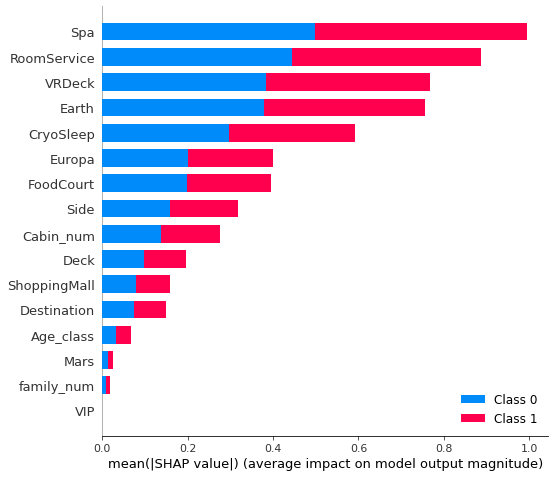

In [264]:
explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(X)
shap.summary_plot(shap_values,X)

# Submission

- the lgbm showed the highest prediction score

In [340]:
prediction=lgbm.predict(test_df).astype('int')

In [341]:
prediction

array([1, 0, 1, ..., 1, 1, 1])

In [342]:
sub=pd.read_csv("sample_submission.csv")

In [343]:
sub['Transported']=prediction
values={1:True,0:False}
sub['Transported']=sub['Transported'].replace(values)
sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [344]:
sub.to_csv("lgbm_spaceship.csv",index=False)